<a href="https://colab.research.google.com/github/Shreya-data/Email-Campaign-Effectiveness-prediction/blob/main/Email_Campaign_Effectiveness_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font size='8px'>**Project Name**    -  <font size='8px'><font color='purple'>**Email Campaign Effectiveness Prediction**

##### **Project Type**    - <font color='red'>**Classification**
##### **Contribution**    - <font color='red'>**(Shreya Agrawal) Individual**


# **Project Summary -**

Email campaign is a sequence of marketing efforts that contacts multiple recipients at once. Email campaigns are designed to reach out to subscribers at the best time and provide valuable content and relevant offers. Using email campaigns allows businesses to build deep and trusting relationships with their customers. Marketing through Email can make communication with clients easier and more effective. Email campaigns are a very powerful medium between a business company and its audience. It helps not only to increase sales but build brand image. Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in business.

The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader.

Performing exploratory data analysis helped us to understand the features and relationships that they have and their impact on the target or the client's response and find out important insights.

Data is labeled and the target column being categorical, I implemented classification based machine learning algorithms to complete the prediction task.

The Email campaign data contains various types of information regarding the emails that were sent, it contains information about their customers and their responses. Checking the shape of the data, I found that it has 68353 observations and 12 columns.
    
Null values and outliers were treated accordingly. I checked data distributions for various features. New features were created from existing and correlated features to solve the problem of multicollinearity. I used Synthetic Minority Oversampling Technique (SMOTE) to handle the imbalance in the target column.
I used the model such as Logistic Regression, Random Forest classifier and Xgboost classifier and also tuned it with Hyperparameter. To evaluate the performance of the model, I split our data into a training set and a testing set. I used the training set to fit the model and the testing set to evaluate its performance. I used a variety of metrics, such as precision, recall, and F1 score, to assess the model's accuracy and effectiveness, but the problem statement clearly mentioned that we need to characterize the mails based on the user response, thus I decided to use F1 Score and AUC-ROC Score then I compared these evaluation metrics of each classifiers and found the best model among all model. After that I checked the feature importance for the model that performed the best.

Once got the best model, it can be deployed in a production environment to help small to medium business owners improve the effectiveness of their email marketing campaigns. By using the model to characterize and track emails, they will be able to make more informed decisions about how to target their marketing efforts and increase customer retention.

# **GitHub Link -**

https://github.com/Shreya-data/Email-Campaign-Effectiveness-prediction

# **Problem Statement**

Small to medium business owners are using Gmail-based email marketing strategies to convert prospective customers into leads, but they are unable to track which emails are being ignored, read, or acknowledged by the reader. They want to create a machine learning model to help characterize and track these emails. The main objective is to improve the effectiveness of their email marketing efforts and increase customer retention.

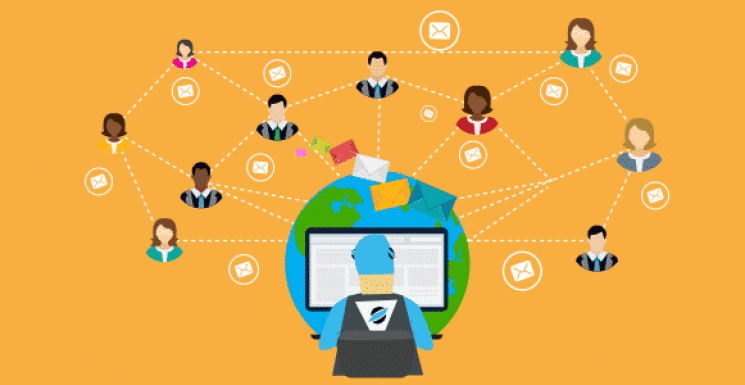

---

##Process Outline:
---

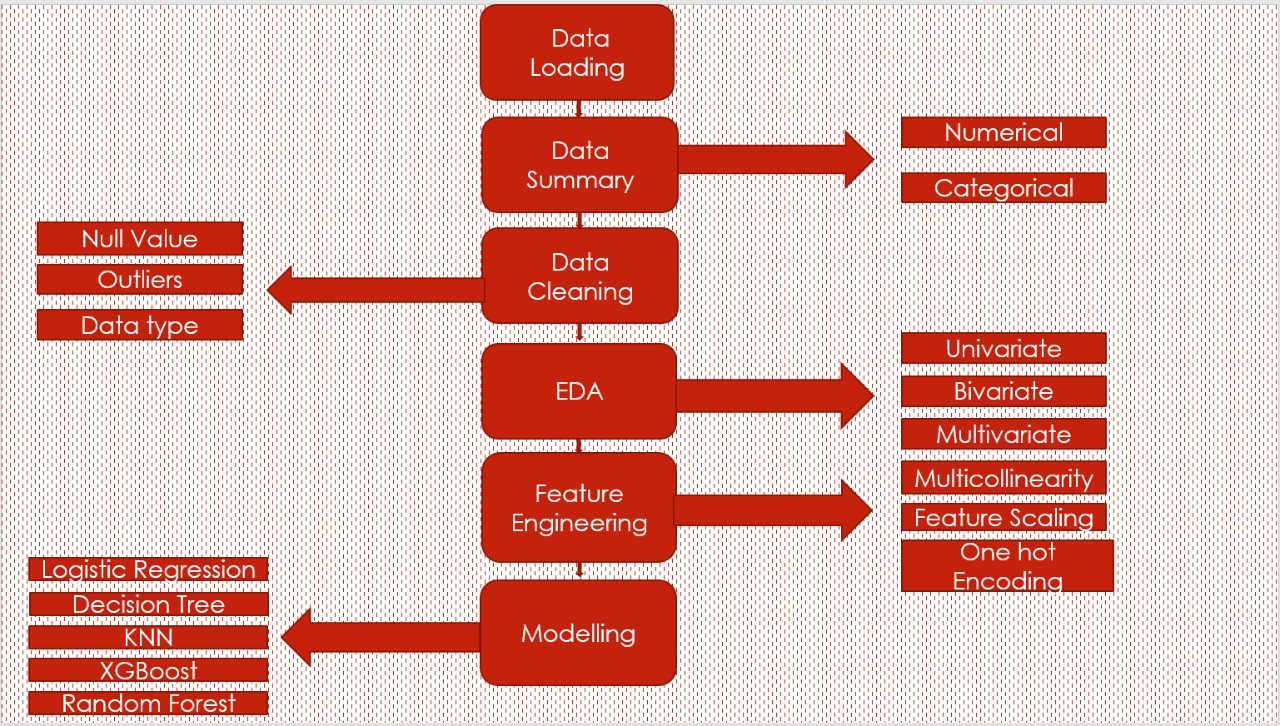

# **Let's Begin !**


## **1. Know Your Data**

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Mount the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [ ]:
# read the dataset      
dataset = pd.read_csv("/content/drive/MyDrive/data_email_campaign.csv")

### Dataset First View

In [ ]:
#first 5 values
dataset.head()

Email_ID  Email_Type  Subject_Hotness_Score  Email_Source_Type  \
0  EMA00081000034500           1                    2.2                  2   
1  EMA00081000045360           2                    2.1                  1   
2  EMA00081000066290           2                    0.1                  1   
3  EMA00081000076560           1                    3.0                  2   
4  EMA00081000109720           1                    0.0                  2   

  Customer_Location  Email_Campaign_Type  Total_Past_Communications  \
0                 E                    2                       33.0   
1               NaN                    2                       15.0   
2                 B                    3                       36.0   
3                 E                    2                       25.0   
4                 C                    3                       18.0   

   Time_Email_sent_Category  Word_Count  Total_Links  Total_Images  \
0                         1         440          8.0           0.0   
1                         2         504          5.0           0.0   
2                         2         962          5.0           0.0   
3                         2         610         16.0           0.0   
4                         2         947          4.0           0.0   

   Email_Status  
0             0  
1             0  
2             1  
3             0  
4             0

In [ ]:
#last 5 values
dataset.tail()

Email_ID  Email_Type  Subject_Hotness_Score  \
68348  EMA00089995974500           2                    0.4   
68349  EMA00089998225300           1                    1.3   
68350  EMA00089998436500           1                    2.2   
68351  EMA00089999168800           1                    0.4   
68352  EMA00089999316900           1                    1.5   

       Email_Source_Type Customer_Location  Email_Campaign_Type  \
68348                  1                 F                    2   
68349                  1                 C                    2   
68350                  2               NaN                    2   
68351                  1                 E                    2   
68352                  1                 G                    2   

       Total_Past_Communications  Time_Email_sent_Category  Word_Count  \
68348                       22.0                         3         737   
68349                       40.0                         2         653   
68350                       33.0                         2         490   
68351                       50.0                         1         733   
68352                       20.0                         2        1038   

       Total_Links  Total_Images  Email_Status  
68348         16.0          13.0             0  
68349         31.0          16.0             0  
68350          9.0           0.0             0  
68351         14.0           4.0             0  
68352          6.0           0.0             0

### Dataset Rows & Columns count

In [ ]:
print(f"There are {dataset.shape[0]} rows and {dataset.shape[1]} columns")

There are 68353 rows and 12 columns


### Dataset Information

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


#### Duplicate Values

In [ ]:
print(f"There are {len(dataset[dataset.duplicated()])} duplicates in the dataset")

There are 0 duplicates in the dataset


#### Missing Values/Null Values

In [ ]:
dataset.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

<AxesSubplot:>

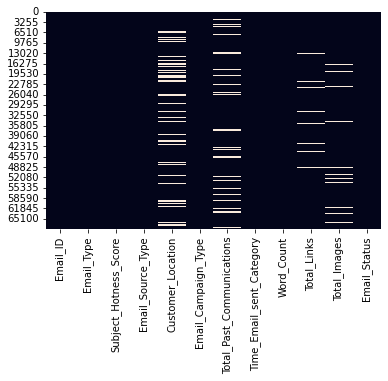

In [ ]:
# Visualizing the missing values
sns.heatmap(dataset.isnull(), cbar=False)

### What did you know about your dataset?

####I got to know the following things about the dataset:
* There are 68353 rows and 12 columns present in the dataset.
* Information about the Datatype of each column.
* There are null values in four features namely, customer_location, total_past_communication, Total_links, Total_images.
* There are no duplicate values found!

## **2. Understanding Your Variables**

In [ ]:
#column names
dataset.columns.values

array(['Email_ID', 'Email_Type', 'Subject_Hotness_Score',
       'Email_Source_Type', 'Customer_Location', 'Email_Campaign_Type',
       'Total_Past_Communications', 'Time_Email_sent_Category',
       'Word_Count', 'Total_Links', 'Total_Images', 'Email_Status'],
      dtype=object)

In [ ]:
#new dataframe
Cat_dataset=dataset.copy()

In [ ]:
#change datatype of ['Email_Type','Email_Source_Type','Email_Campaign_Type','Time_Email_sent_Category','Email_Status'] from int to object 
#because it is also a nominal categorial data and we want their categorical description.
Cat_dataset[['Email_Type','Email_Source_Type','Email_Campaign_Type','Time_Email_sent_Category','Email_Status']]=Cat_dataset[['Email_Type',
                                          'Email_Source_Type','Email_Campaign_Type','Time_Email_sent_Category','Email_Status']].astype("str")

### Here I will be using pandas describe method to have an intution about the basic behaviour of data, furthermore I will use nunique method to have a more understanding of the data.


---


In [ ]:
#categorical description
Cat_dataset.describe(include="object")

Email_ID Email_Type Email_Source_Type Customer_Location  \
count               68353      68353             68353             56758   
unique              68353          2                 2                 7   
top     EMA00081000034500          1                 1                 G   
freq                    1      48866             37149             23173   

       Email_Campaign_Type Time_Email_sent_Category Email_Status  
count                68353                    68353        68353  
unique                   3                        3            3  
top                      2                        2            0  
freq                 48273                    41129        54941

---
### **Observations:**
---

* There are two unique email type 1 and 2, where 1 is on the top with frequency 48866.

* Email_Source_Type has 2 unique values 1 and 2, where 1 is on the top with frequency 37149.

* There is 7 different demographic location of the customers. Most of the customers is in G location with frequency 23173.

* Email_Campaign_Type has 3 unique campaign type of the email which are 1,2 and 3, where 2 is mostly used with frequency 48273.

* Time_Email_sent_Category has 3 categories 1,2 and 3 in which 2 is most prefer time of sending the email.

* Email_Status also has 3 categories 0,1 and 2 in which mostly the status of the email is 0.
---


In [ ]:
#numerical description
Cat_dataset.describe()

Subject_Hotness_Score  Total_Past_Communications    Word_Count  \
count           68353.000000               61528.000000  68353.000000   
mean                1.095481                  28.933250    699.931751   
std                 0.997578                  12.536518    271.719440   
min                 0.000000                   0.000000     40.000000   
25%                 0.200000                  20.000000    521.000000   
50%                 0.800000                  28.000000    694.000000   
75%                 1.800000                  38.000000    880.000000   
max                 5.000000                  67.000000   1316.000000   

        Total_Links  Total_Images  
count  66152.000000  66676.000000  
mean      10.429526      3.550678  
std        6.383270      5.596983  
min        1.000000      0.000000  
25%        6.000000      0.000000  
50%        9.000000      0.000000  
75%       14.000000      5.000000  
max       49.000000     45.000000

---
### **Observations:**
---

* Subject Hotness Score is float value ranges from 0 to 5, where 0 is not hot, 5 is very hot. The average subject hotness score for the given data set is around 1.10

* Average total past communications is around 29. maximum total past communications are around 67 and the minimum is 0.

* Average word count is around 700 words. An email was sent with maximum words of around 1316 words. An email was sent with minimum words around 40 words.

* Average total links sent is around 10 links, and the maximum total links sent is around 49 links, the minimum is 1 link.

* Average total images sent through an email is around 4 images. The maximum total images sent are around 45 images and the minimum is 0.
---

### Variables Description 

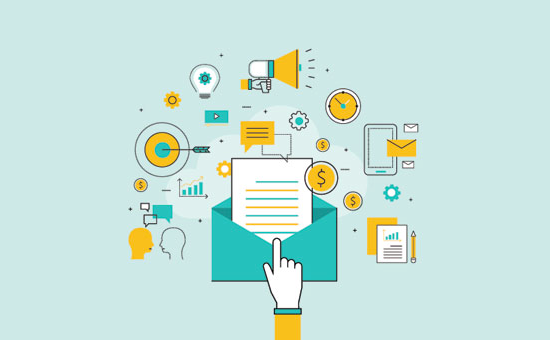

##**Attribute Information:**

---
* **Email_Id** - Email id of customer
* **Email_Type** - Email type contains 2 categories 1 and 2. We can assume that the types are like promotional email or sales email.
* **Subject_Hotness_Score** - It is the email's subject's score on the basis of how good and effective the content is.
* **Email_Source_Type** - It represents the source of the email like sales,marketing or product type email.
* **Email_Campaign_Type** - The campaign type of the email.
* **Customer_Location** - Categorical data which explains the different demographic location of the customers.
* **Total_Past_Communications** - This columns contains the total previous mails from the same source.
* **Time_Email_sent_Category** - It has 3 categories: 1,2 and 3 which are considered as morning,evening and night time slot.
* **Word_Count** - Total count of word in each email
* **Total_links** - Total number of links in the email
* **Total_Images** - Total Number of images in the email
* **Email_Status** - Our target variable which contains whether the mail was ignored, read, acknowledged by the reader

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("No. of unique values in '{}' is {}.".format(i, dataset[i].nunique()))

No. of unique values in 'Email_ID' is 68353.
No. of unique values in 'Email_Type' is 2.
No. of unique values in 'Subject_Hotness_Score' is 51.
No. of unique values in 'Email_Source_Type' is 2.
No. of unique values in 'Customer_Location' is 7.
No. of unique values in 'Email_Campaign_Type' is 3.
No. of unique values in 'Total_Past_Communications' is 64.
No. of unique values in 'Time_Email_sent_Category' is 3.
No. of unique values in 'Word_Count' is 151.
No. of unique values in 'Total_Links' is 37.
No. of unique values in 'Total_Images' is 45.
No. of unique values in 'Email_Status' is 3.


## **3. Data Wrangling**

Data Wrangling is the process of gathering, collecting, and transforming Raw data into another format for better understanding, decision-making, accessing, and analysis in less time. Data Wrangling is also known as Data Munging.

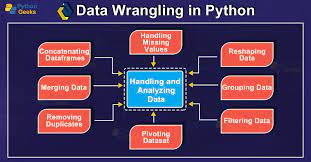

In [ ]:
dataset.drop(columns="Email_ID",inplace=True)

In [ ]:
num_feature=Cat_dataset.describe().columns.values

In [ ]:
cat_feature=set(Cat_dataset.describe(include="object").columns.values)-{'Email_Status','Email_ID'}

In [ ]:
dataset.head()

Email_Type  Subject_Hotness_Score  Email_Source_Type Customer_Location  \
0           1                    2.2                  2                 E   
1           2                    2.1                  1               NaN   
2           2                    0.1                  1                 B   
3           1                    3.0                  2                 E   
4           1                    0.0                  2                 C   

   Email_Campaign_Type  Total_Past_Communications  Time_Email_sent_Category  \
0                    2                       33.0                         1   
1                    2                       15.0                         2   
2                    3                       36.0                         2   
3                    2                       25.0                         2   
4                    3                       18.0                         2   

   Word_Count  Total_Links  Total_Images  Email_Status  
0         440          8.0           0.0             0  
1         504          5.0           0.0             0  
2         962          5.0           0.0             1  
3         610         16.0           0.0             0  
4         947          4.0           0.0             0

In [ ]:
# Creates a pivot table dataframe
  
table =[{value:pd.pivot_table(dataset, values =value, index =['Email_Type', 'Email_Source_Type','Time_Email_sent_Category'],
                         columns =['Email_Status'], aggfunc = np.sum)} for value in num_feature]

table

[{'Subject_Hotness_Score': Email_Status                                                 0       1      2
  Email_Type Email_Source_Type Time_Email_sent_Category                        
  1          1                 1                          4526.6   851.3  115.5
                               2                         13071.4  2757.7  341.3
                               3                          4398.6   930.2  100.2
             2                 1                          5907.8   878.1   86.4
                               2                         17209.5  2541.1  269.4
                               3                          5820.9   902.8   71.9
  2          1                 1                          2449.7   203.6   27.1
                               2                          7408.7   619.0   77.2
                               3                          2411.7   176.7   20.9
             2                 1                            99.3    32.8    8.8
               

### What all manipulations have you done and insights you found?

From the above manipulations, for the columns of Email_Status 0, 1 and 2 respectively, I found out that

* Subject_Hotness_Score is maximum for Email_Type 1, for Email_Source_type 2 and for Time_Email_Sent_Category 2. 

* Total_Past_Communications is maximum for Email_Type 1, for Email_Source_type 1 and for Time_Email_Sent_Category 2.

* Email_Status is maximum for Email_Type 1, for Email_Source_type 2 and for Time_Email_Sent_Category 2.

* Total_Links is maximum for Email_Type 1, for Email_Source_type 2 and for Time_Email_Sent_Category 2.

* Total_Images is maximum for Email_Type 1, for Email_Source_type 2 and for Time_Email_Sent_Category 2.

## **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

As the “age of Big Data” kicks into high gear, visualization is an increasingly key tool to make sense of the trillions of rows of data generated every day. Data visualization helps to tell stories by curating data into a form easier to understand, highlighting the trends and outliers. A good visualization tells a story, removing the noise from data and highlighting useful information. 

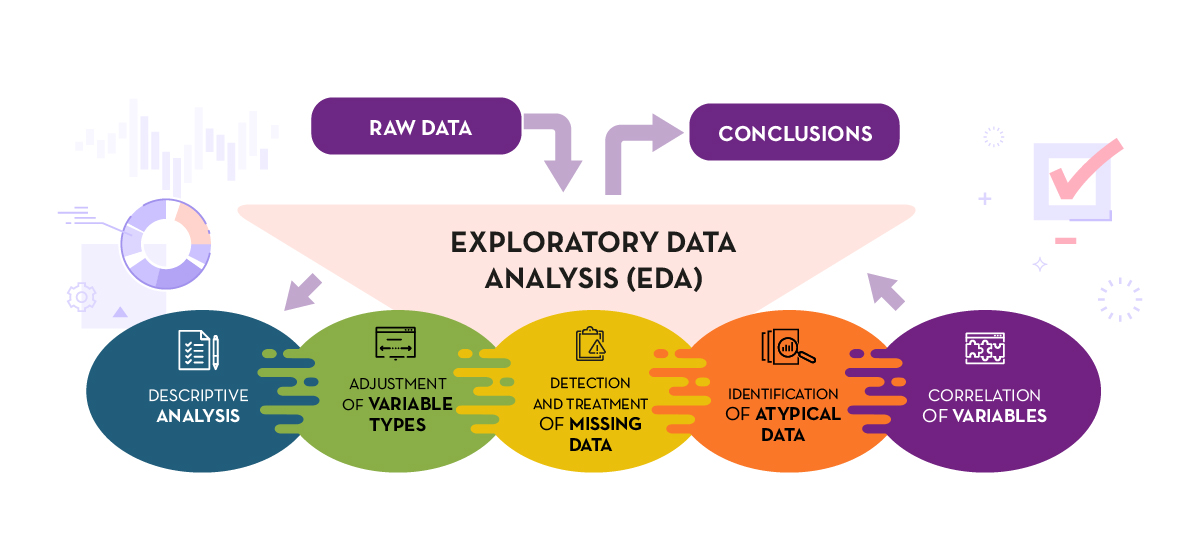

In [ ]:
# Installing sweetviz
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 66.5 MB/s eta 0:00:00


SweetViz is a Python library that makes exploratory data analysis (EDA) fast and effective.

In [ ]:
# importing sweet
import sweetviz as sv

In [ ]:
report=sv.analyze(dataset)

                                             |          | [  0%]   00:00 -> (? left)


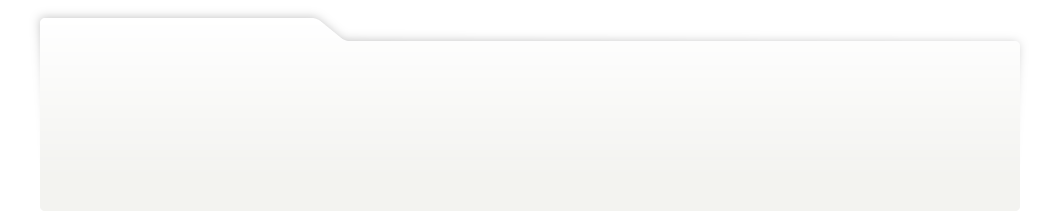
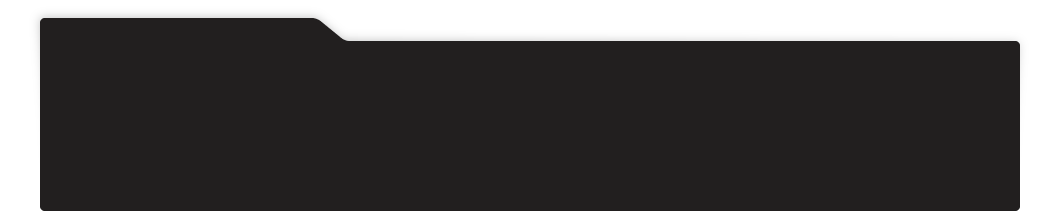
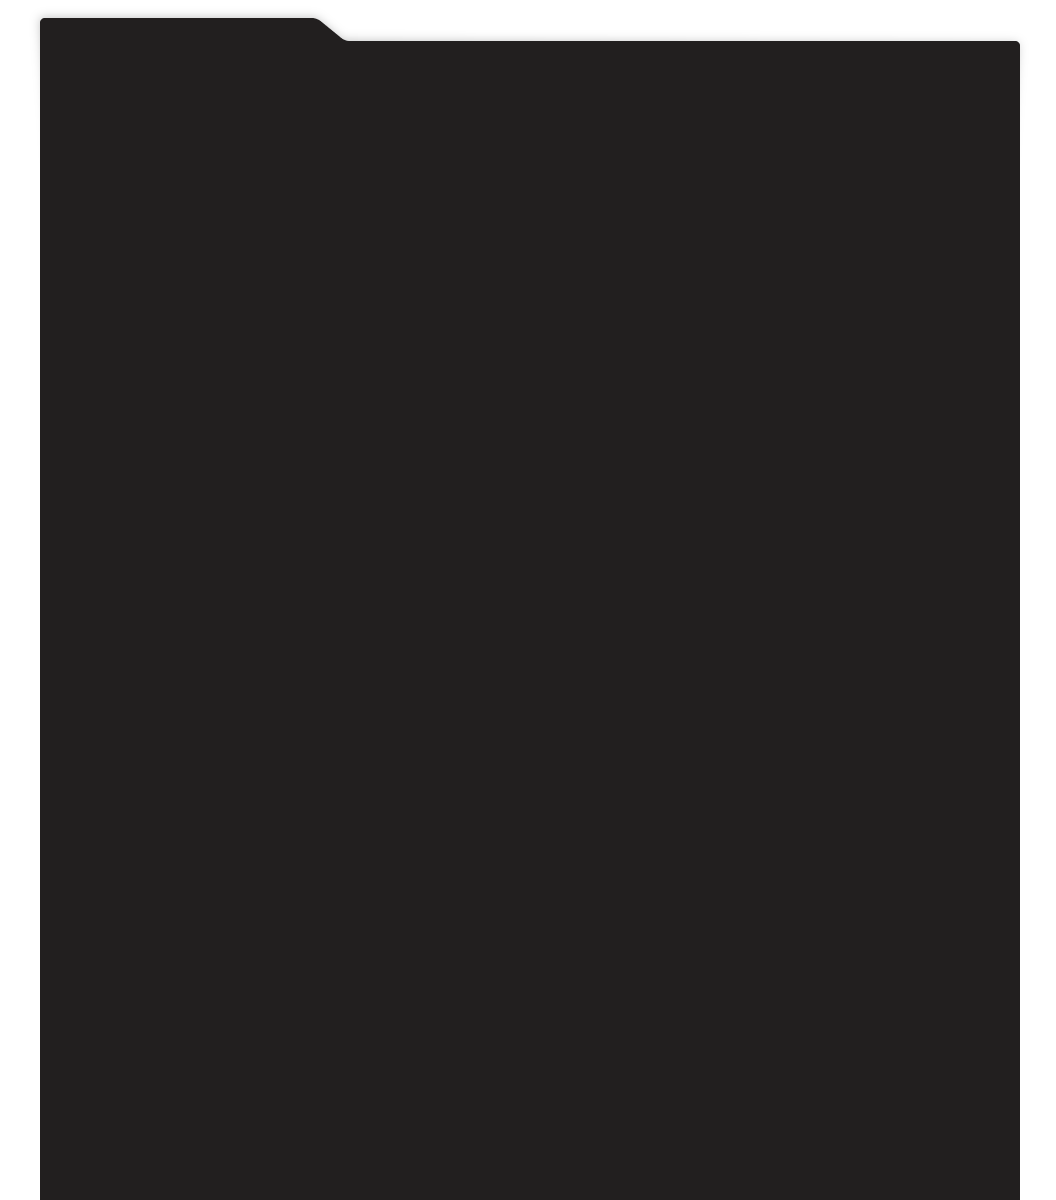
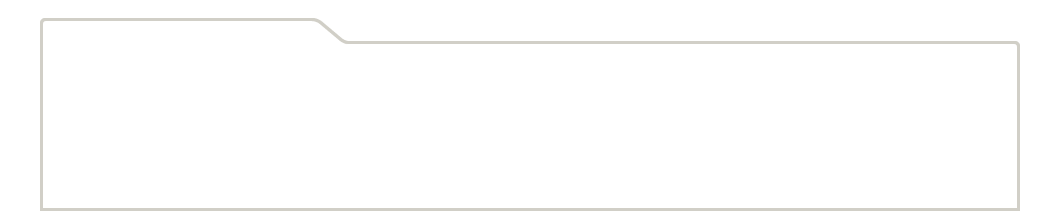
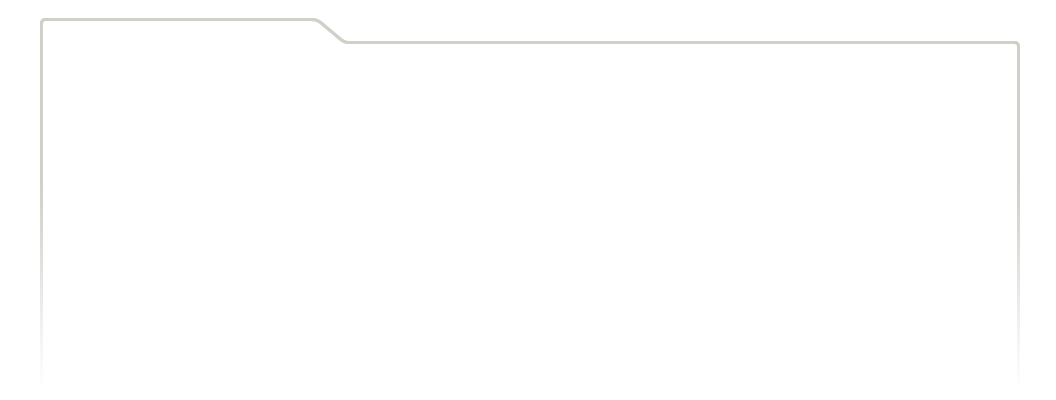
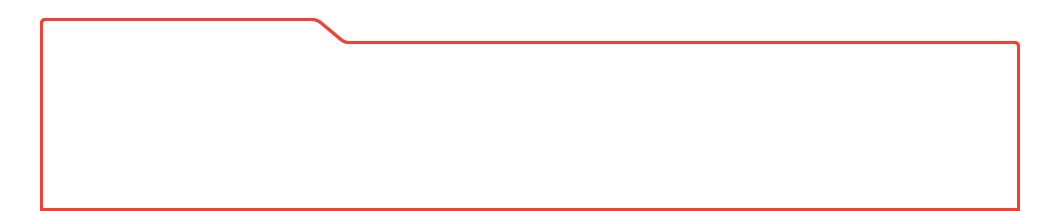
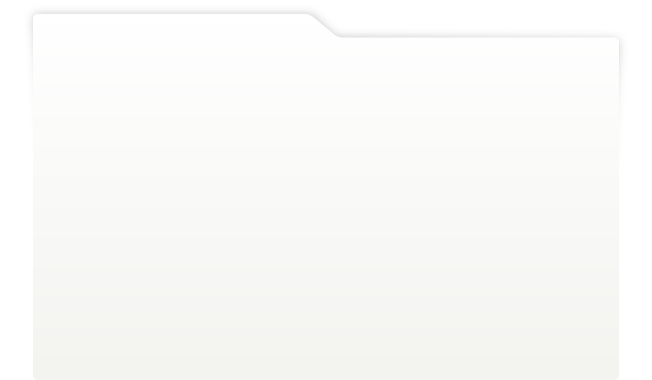
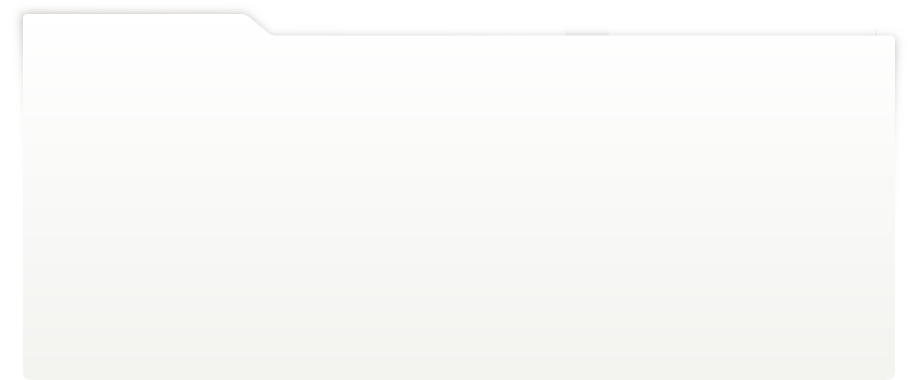
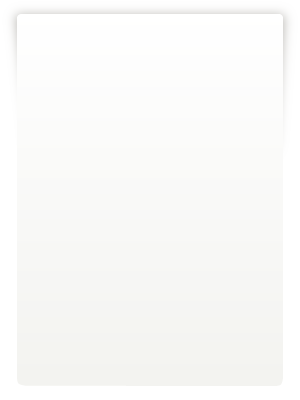
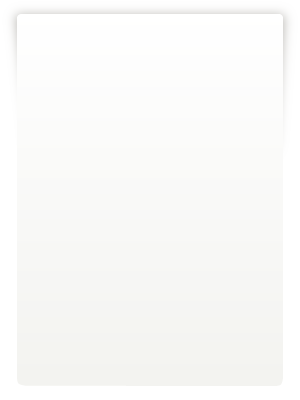
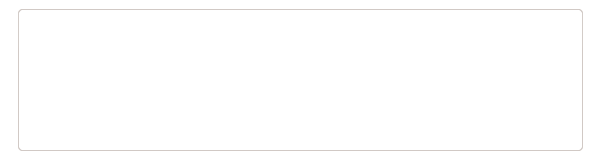
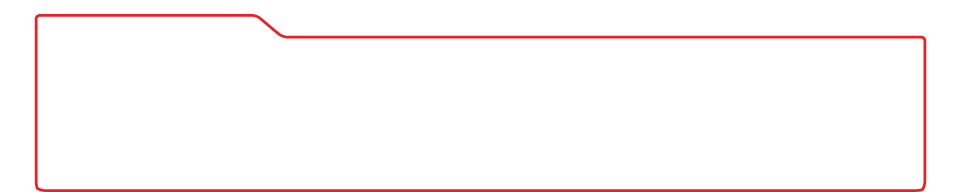
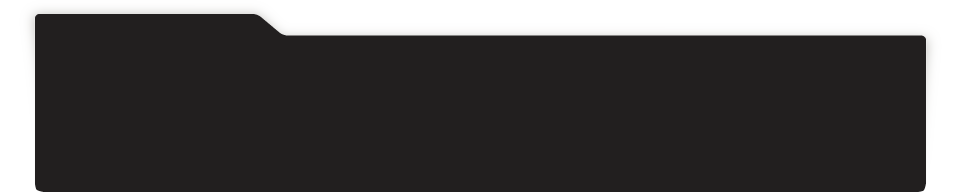
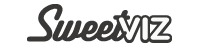
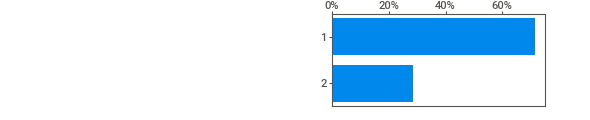
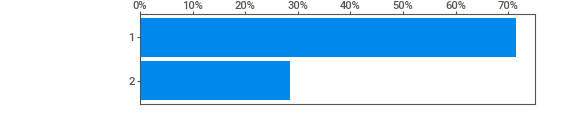
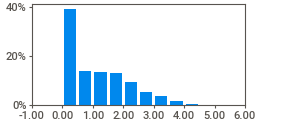
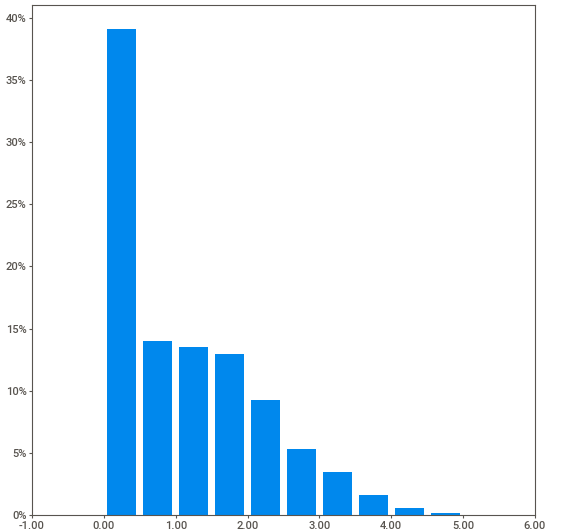
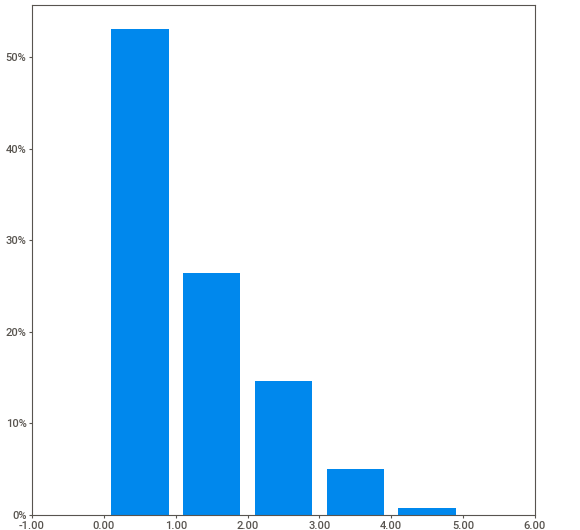
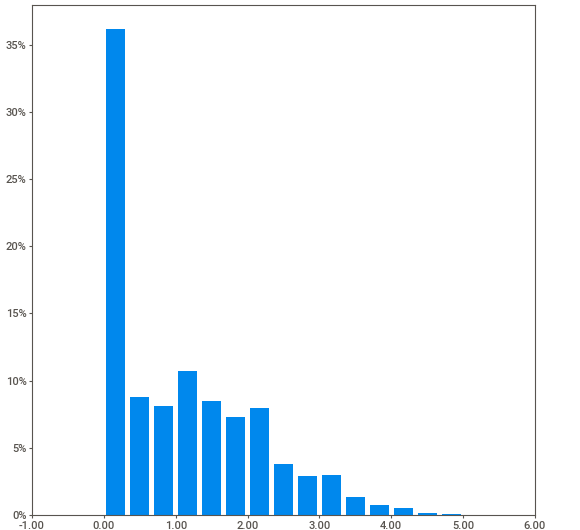
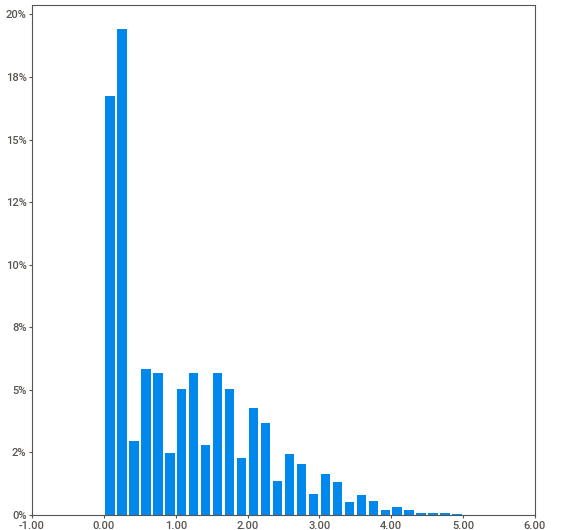
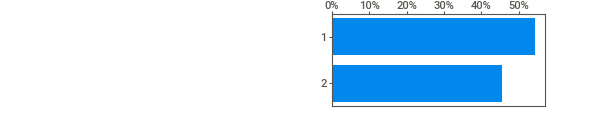
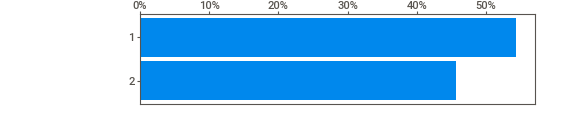
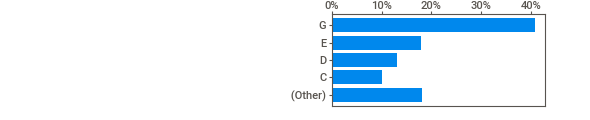
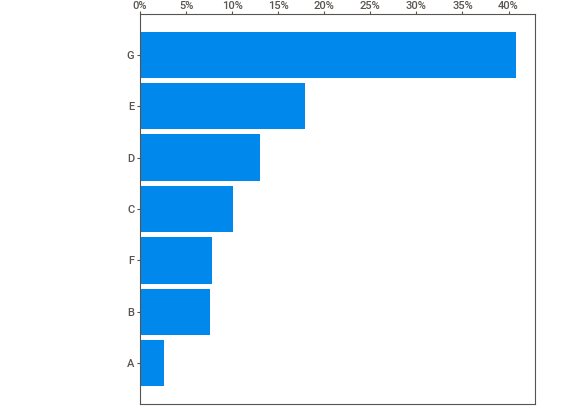
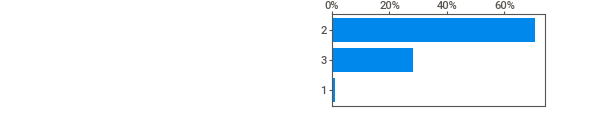
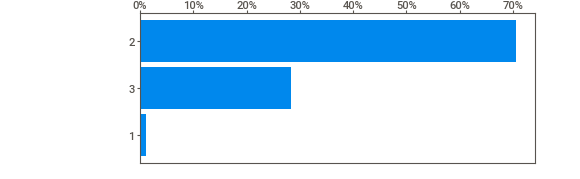
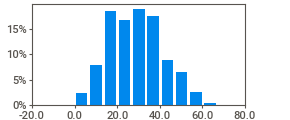
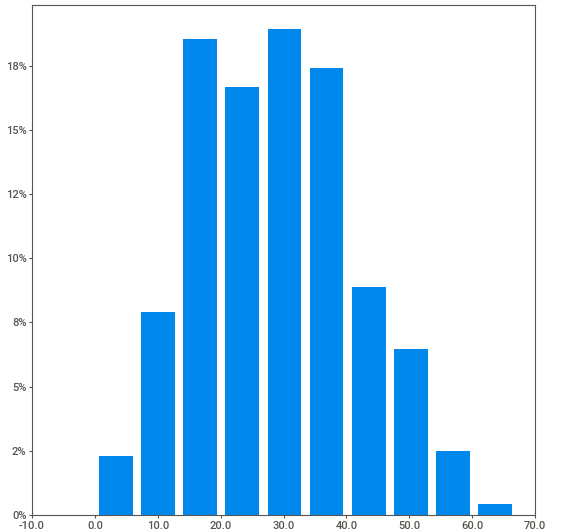
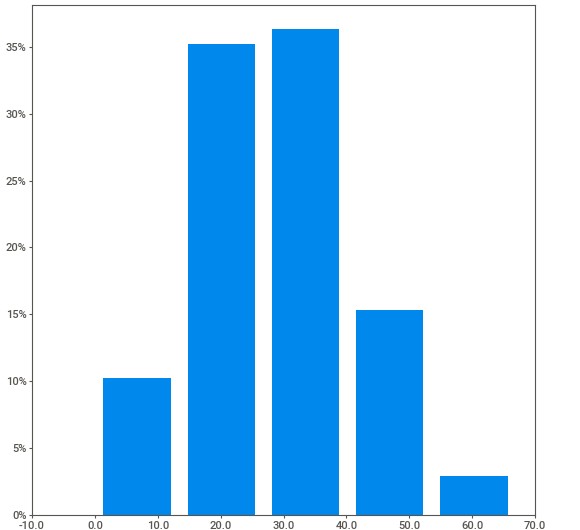
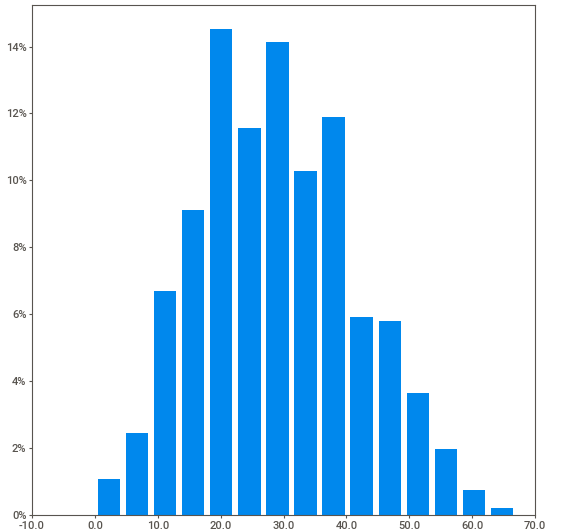
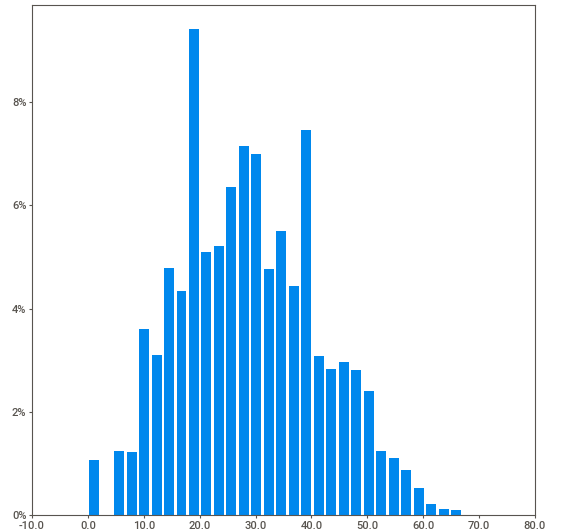
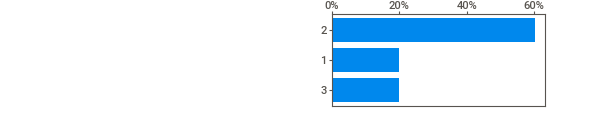
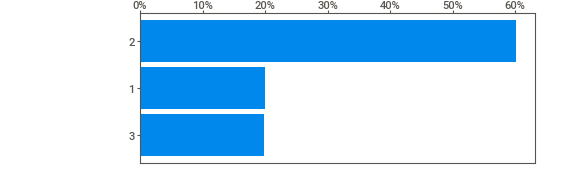
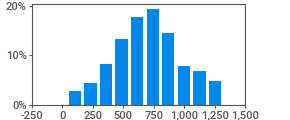
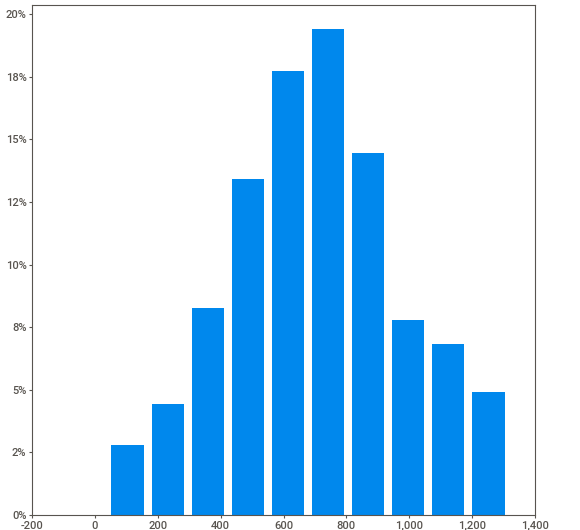
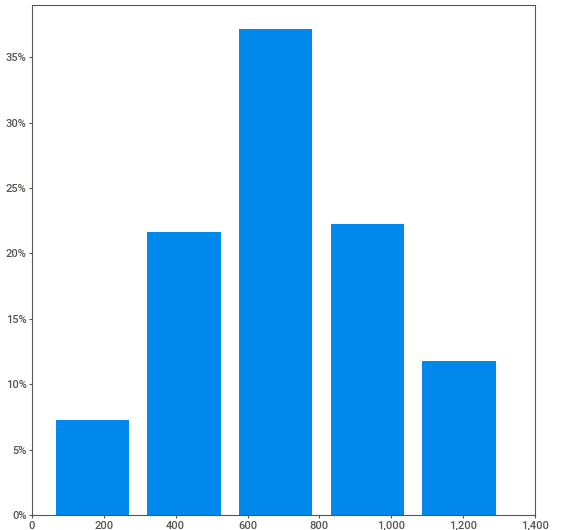
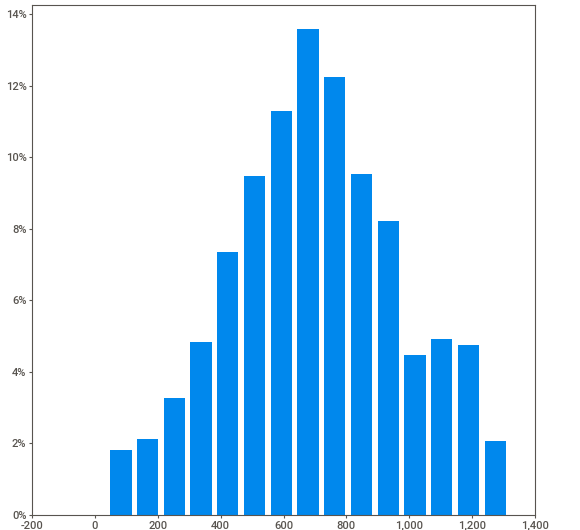
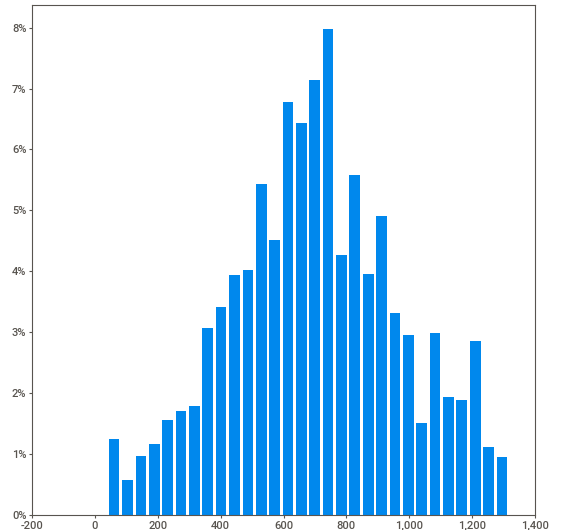
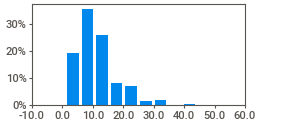
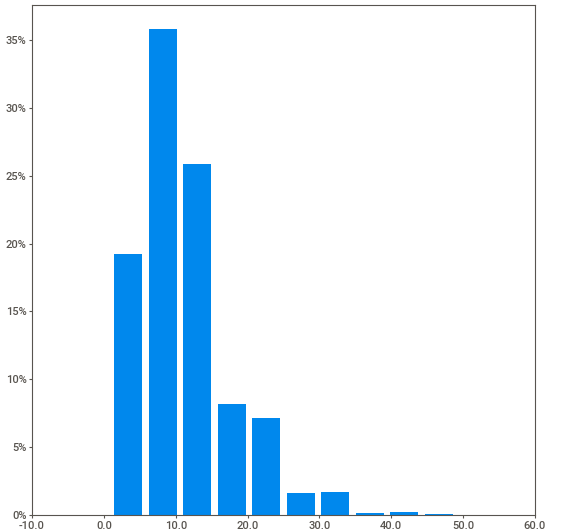
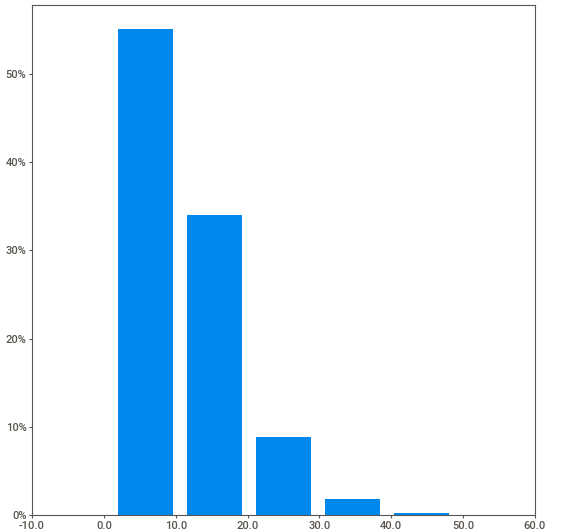
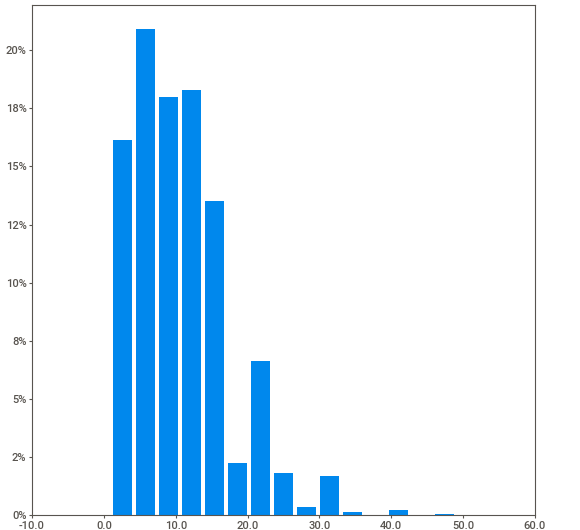
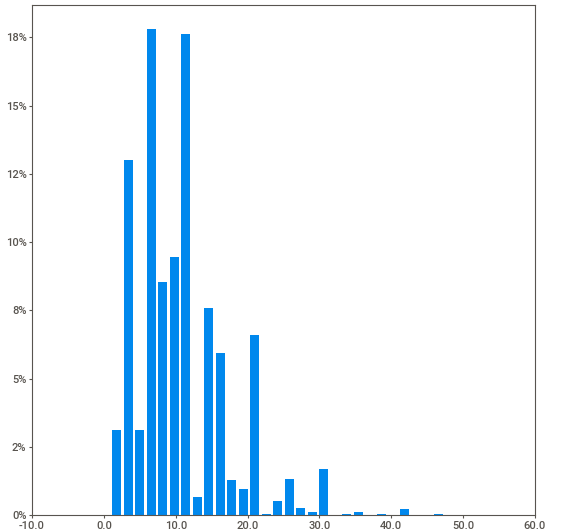
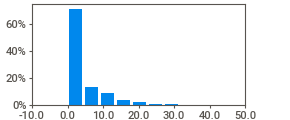
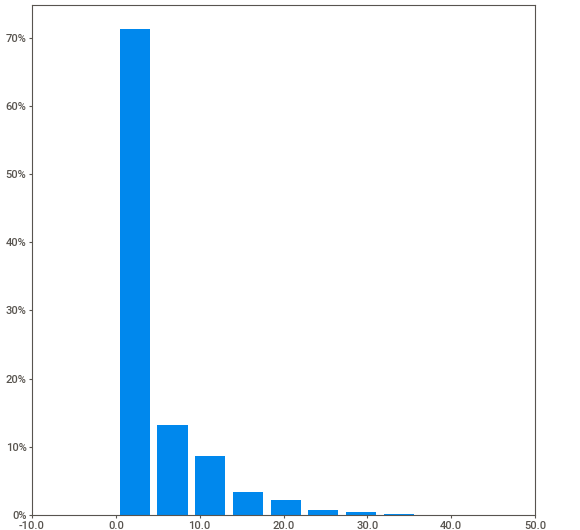
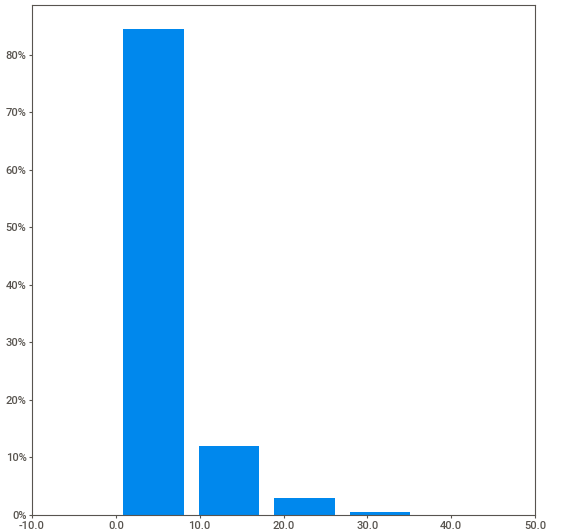
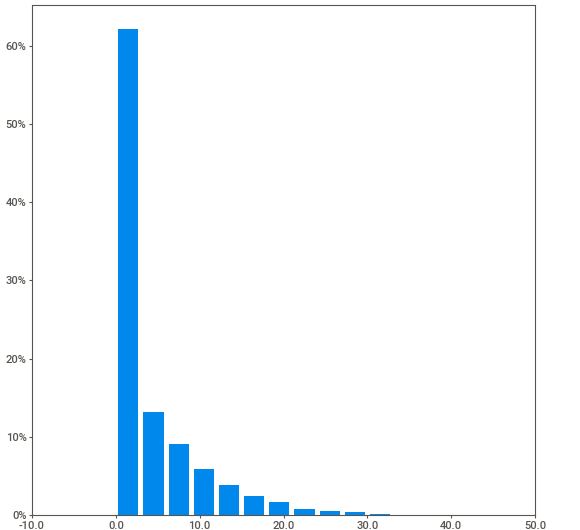
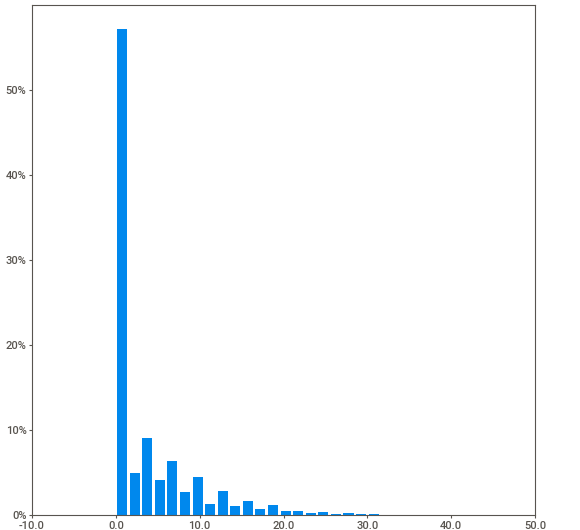
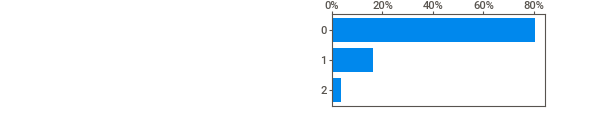
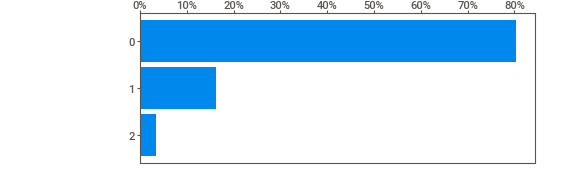
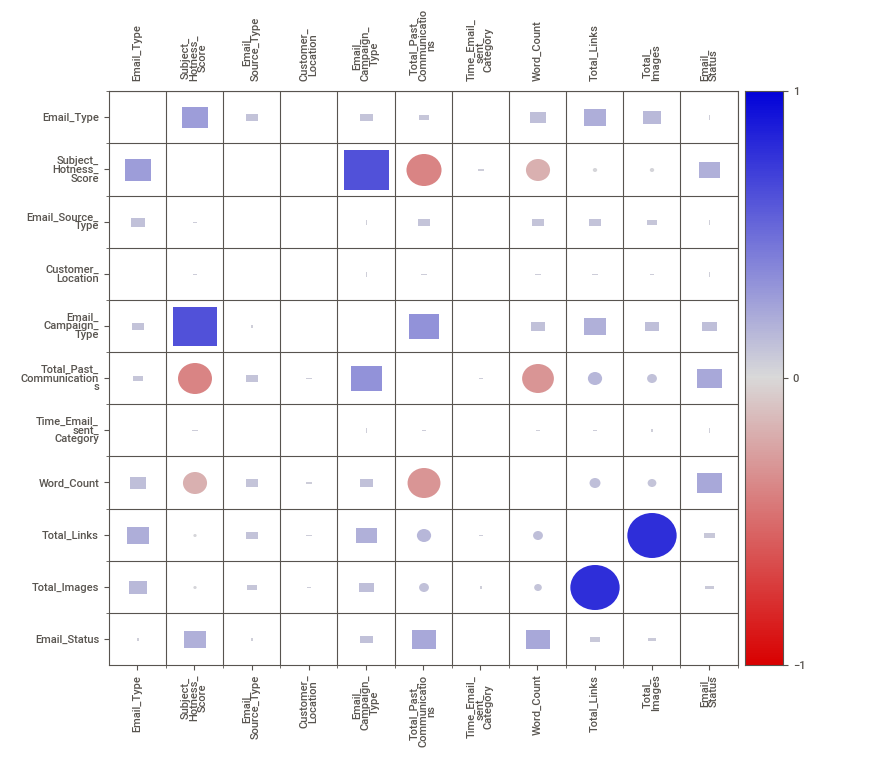
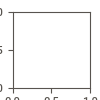

In [ ]:
# Collecting report
report.show_notebook()

#### Chart - 1 Discrete Distribution of Target Variable

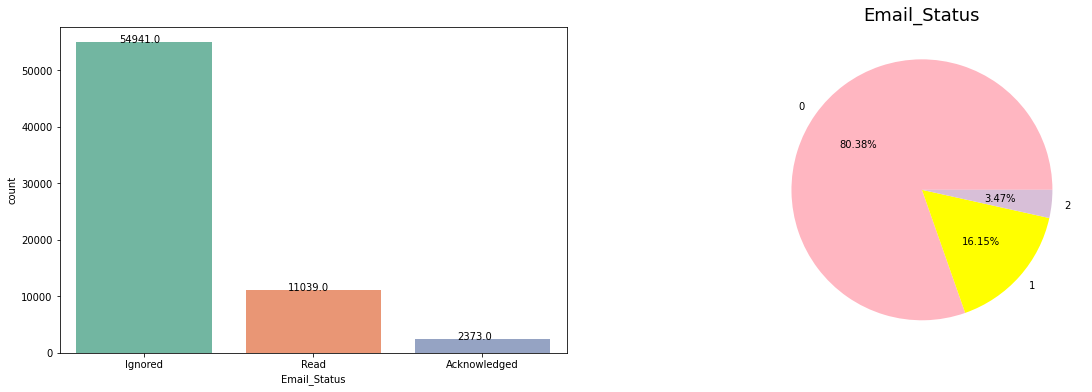

In [ ]:
# visualize the target variable
data = dataset["Email_Status"].value_counts()
plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)
g = sns.countplot(dataset['Email_Status'], palette = "Set2")
g.set_xticklabels(['Ignored','Read', 'Acknowledged'])
for p in g.patches:
  g.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.subplot(1, 2, 2)
plt.pie(data,autopct='%1.2f%%',labels=data.index,colors=("lightpink","yellow","thistle"))
plt.title("Email_Status",fontsize=18)

plt.show()

##### 1. Why did you pick the specific charts?

Since our target variable is categorical, and we know that Bar Chart and Pie Chart are typically used to visualize categorical data. 

* A **bar chart** places the separate values of the data on the x-axis and the height of the bar indicates the count of that category.
* A **pie plot** is a proportional representation of the numerical data in a column.

##### 2. What is/are the insight(s) found from the chart?

 From the above Bar chart and Pie chart, we conclude that
 * No. of Email Read :- 11039 i.e., 16.15%
 * No. of Email Acknowledged :- 2373 i.e., 3.47%
 * No. of Email Ignored :- 54941 i.e., 80.38%

 This result shows that most of the emails were ignored

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights will help us in understanding the effectiveness of email campaign. As we saw that No. of Email Acknowledged are only 3.47%, where as No. of Email Read and Ignored are 16.15% and 80.38% respectively.
for this, we find the factor which make the email acknowledged and use it in other email too, so that it help in the growth of business.

Negative growth means decrement of no. of email acknowledged, since  No. of Email Acknowledged is related less as compare to the other email. if it is decreasing then it lead to negative growth in the business.

#### Chart - 2 Distribution of Numerical Variables

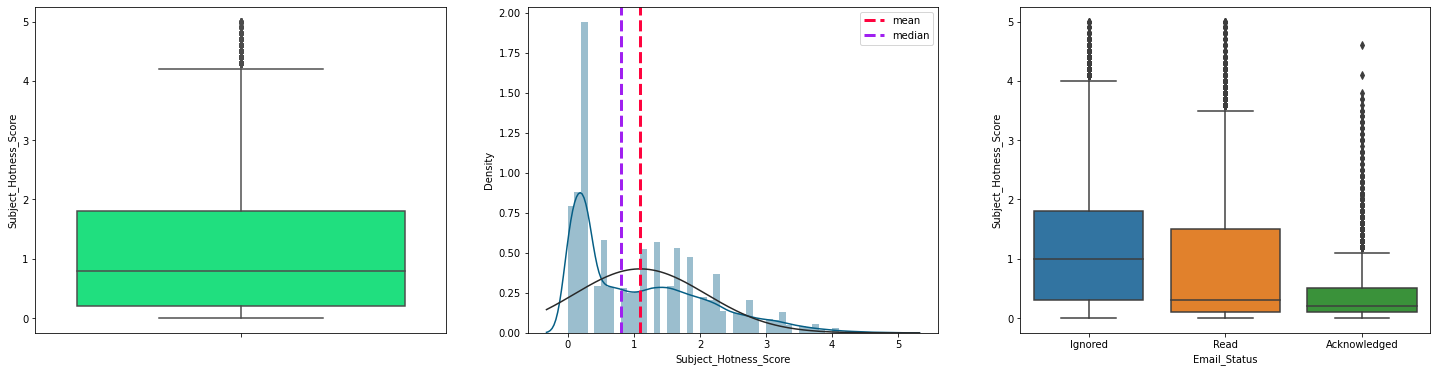

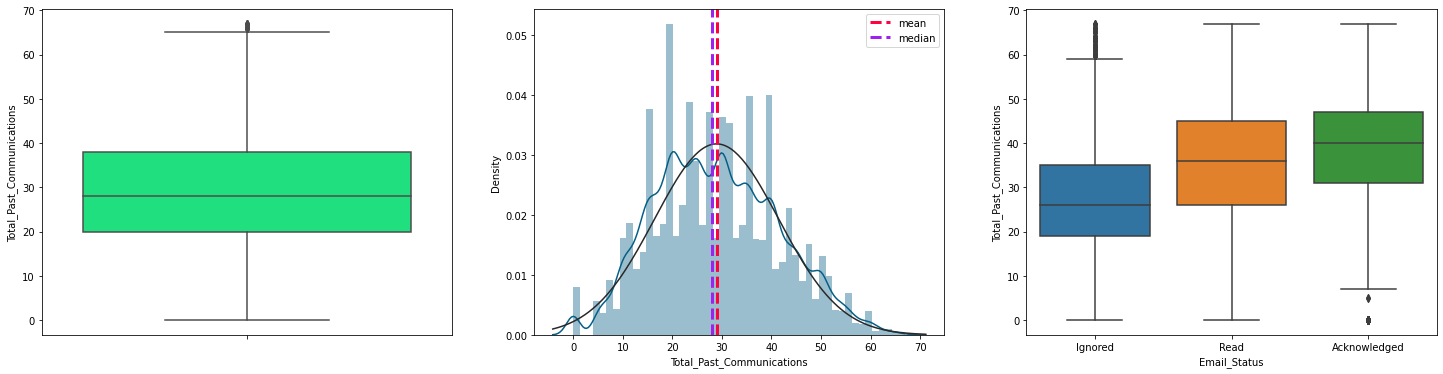

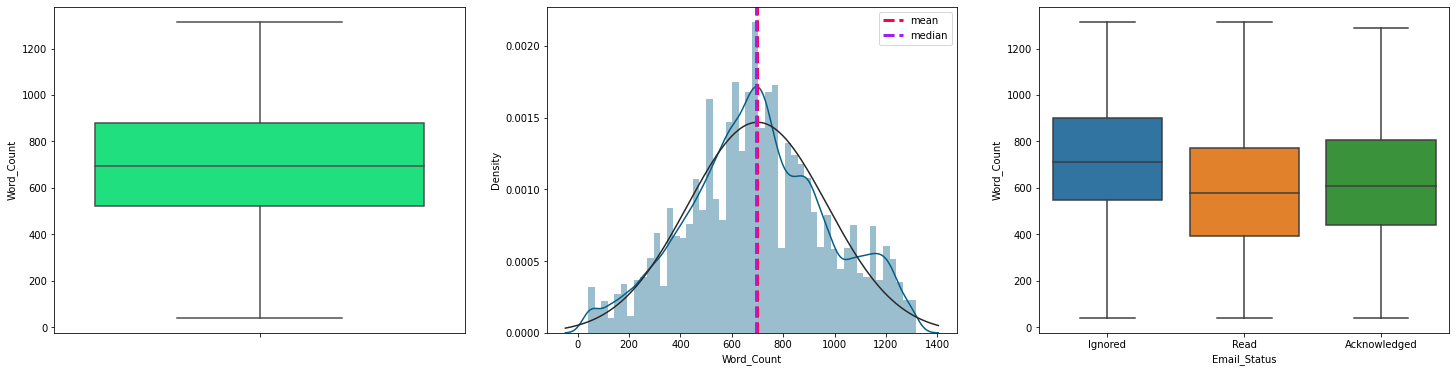

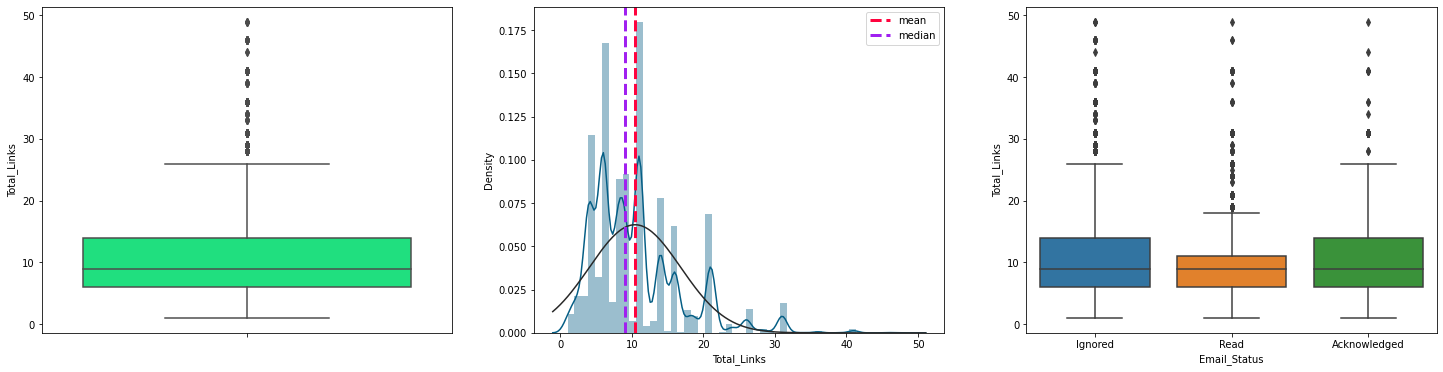

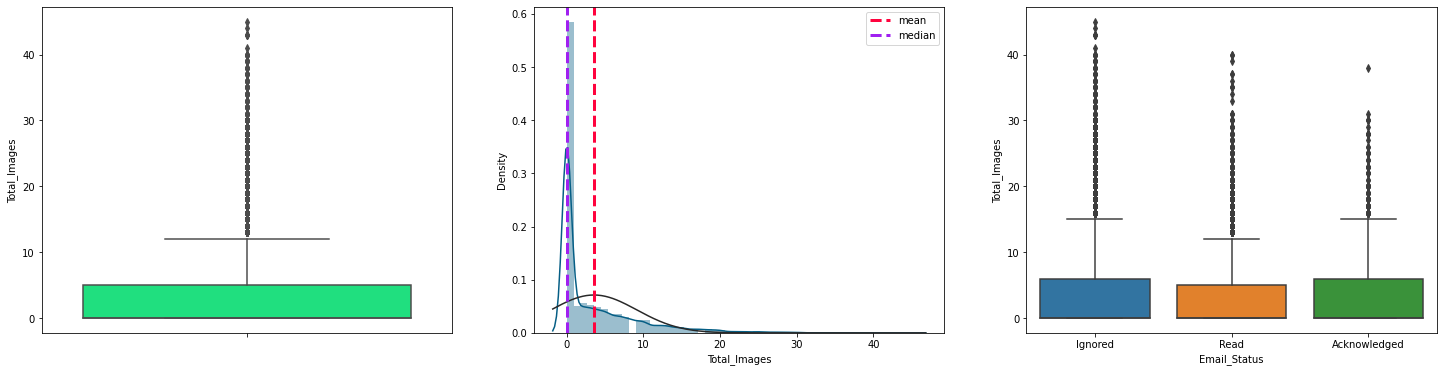

In [ ]:
# visualization of numerical feature
from scipy import stats

for col in num_feature :
    # sns.set_style("ticks")
    # sns.set_context("poster");
    plt.figure(figsize=(25,6))

    plt.subplot(1, 3, 1)
    fig = sns.boxplot(y=dataset[col], color='#00FF7F')
    fig.set_ylabel(col)
    
    plt.subplot(1, 3, 2)
    sns.distplot(dataset[col], color = '#055E85', fit = stats.norm);
    feature = dataset[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')

    plt.subplot(1,3,3)
    f=sns.boxplot(x=dataset["Email_Status"],y=dataset[col])
    f.set_xticklabels(['Ignored','Read', 'Acknowledged'])




##### 1. Why did you pick the specific charts?

Distplot and Boxplot are best for plotting continuous variable and understanding the distribution of the data and visualizing outliers as well as quartiles positions.

##### 2. What is/are the insight(s) found from the chart?

###Boxplot
---
Boxplot gives us 5 point summary which consists of the minimum point, the first quartile, the median, the third quartile, and the maximum point.

from Boxplot, we have got to know about outliers, as we see that, all numerical variable have outliers except wordcount.

---
###Distplot
---
As we know that, positive skewed, negative skewed and no skewed in the data is determined by mean, median amd mode.

if mean > median > mode then, distribution of the data is positively skewed,

if mean = median = mode then, no skewed that is normally distributed,

otherwise, it is negatively skewed.

Subject hotness score, total image and total links are positively skewed whereas wordcount and total comunication count show somewhat normal distribution.

---

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

These plot were drawn to understand distribution of each variable which eventually will help in building model and treating with null values or outliers, however it helps how each values plays important role in creating an effective email campaign.

There are no such insights that lead to negative growth.

### Chart - 3 Distribution of Categorical Variables and Categorical Features vs Email Status

In [ ]:
def catcountplot(data, x_col, y_col, y_labels, perc = 1, color = 'hls'):

  '''Function that will plot the count plots for the indepedent feature
      and separately and also based on the categorical target column.
      Takes 'perc = 1' for plotting of percentage count'''

  plt.figure(figsize=(12,7))

  # Distribution of Independent column
  
  fig, ax = plt.subplots(1, 2, sharex=True, figsize=(25,8), constrained_layout=True)
  sns.countplot(data[x_col],palette = "Set2", ax=ax[0])
  ax[0].set_title(f"Distribution of {x_col}",fontsize=18)
  total = float(len(data[x_col]))

  if perc == 1:
    for p in ax[0].patches:
      percentage = '{:.1f}%'.format(100* p.get_height().round(2)/total)
      x = p.get_x() + p.get_width() 
      y = p.get_height()
      ax[0].annotate(percentage, (x, y), ha="right",va="bottom")
  
  # Distribution of Independent col based on Dependent col 

  sns.countplot(x=data[x_col], hue=data[y_col], data=pd.melt(data) , palette = "Set2", ax=ax[1])
  ax[1].set_title(f"{x_col} vs {y_col}",fontsize=18)
  plt.ylabel("Count of Observations")
  plt.legend(y_labels)
  unique = len([x for x in data[x_col].unique()])
  bars = ax[1].patches
  for i in range(unique):
    catbars=bars[i:][::unique]
    #get height
    total = sum([x.get_height() for x in catbars])
    #print percentage
    if perc == 1:
      for bar in catbars:
        ax[1].text(bar.get_x()+bar.get_width()/2.,
        bar.get_height(),
        f'{bar.get_height()/total:.0%}',
        ha="center",va="bottom")


<Figure size 864x504 with 0 Axes>

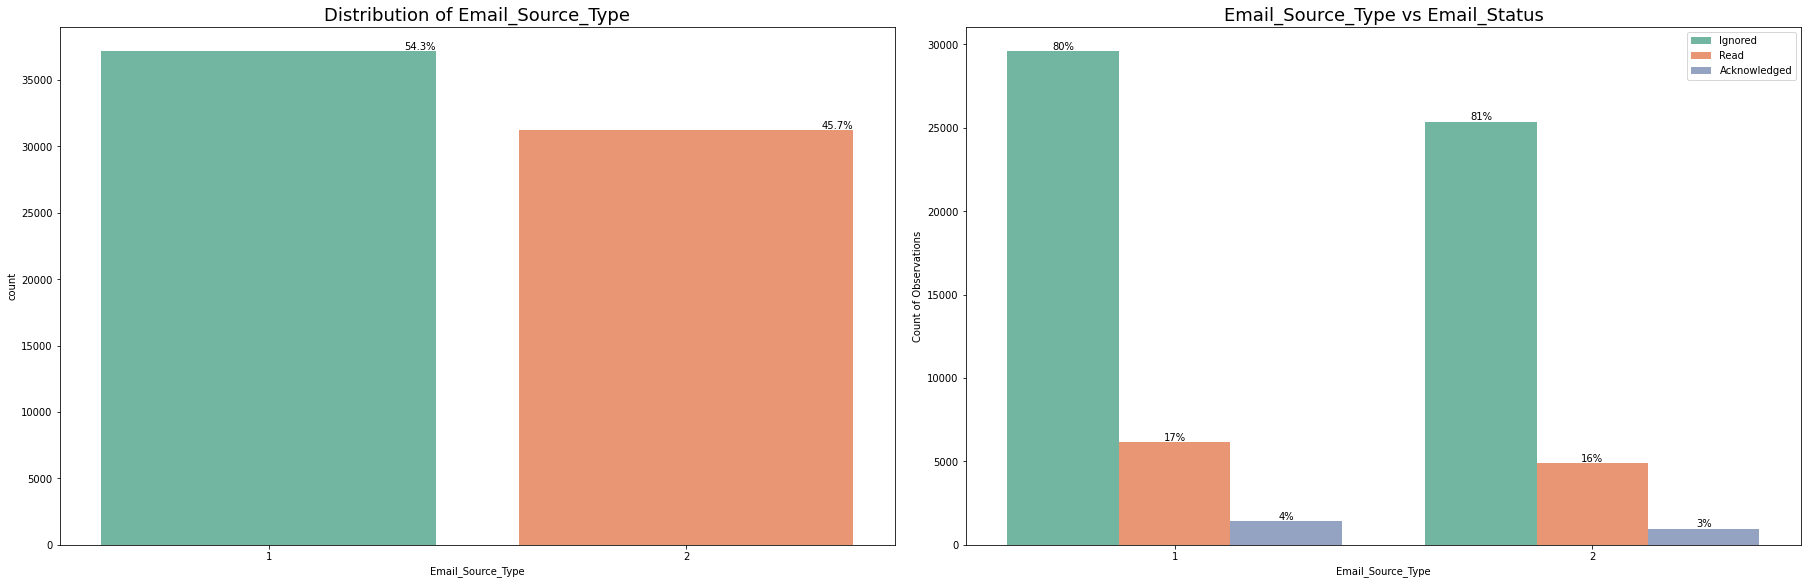

<Figure size 864x504 with 0 Axes>

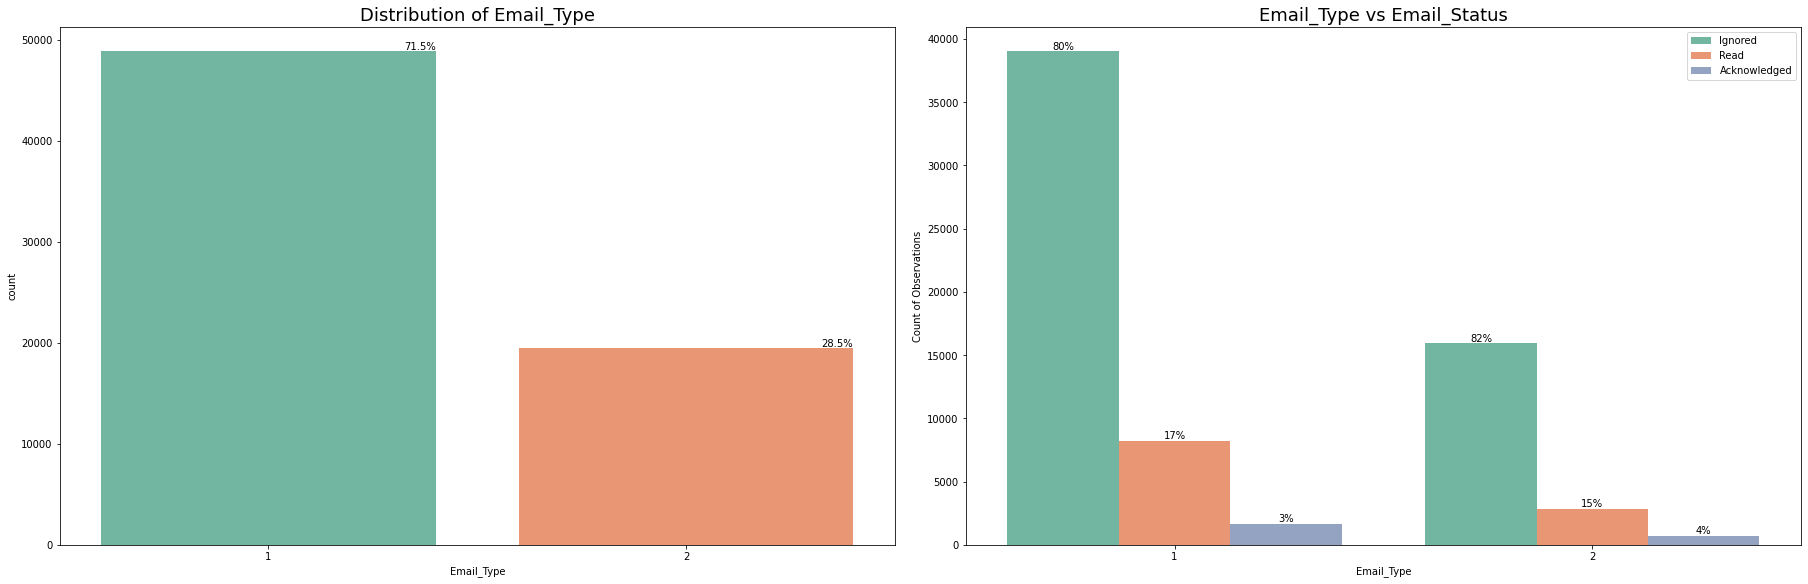

<Figure size 864x504 with 0 Axes>

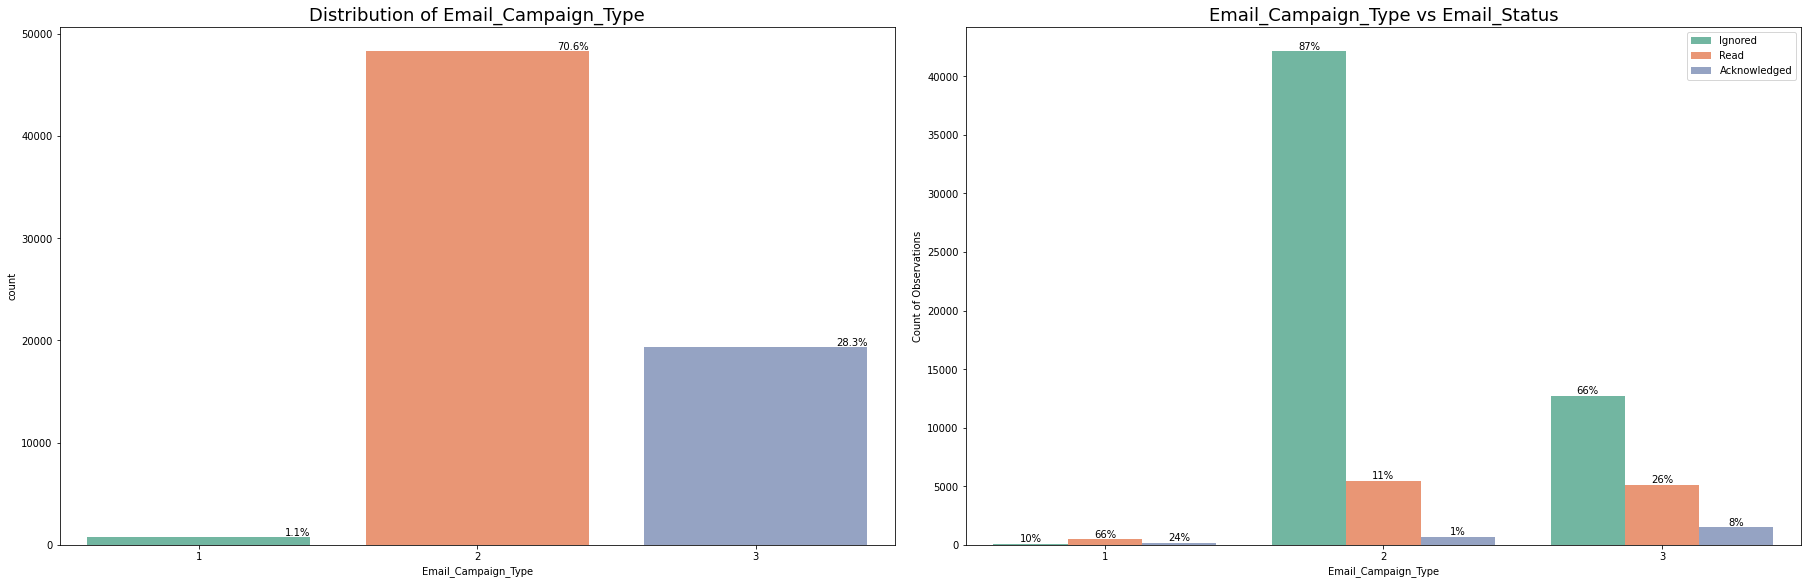

<Figure size 864x504 with 0 Axes>

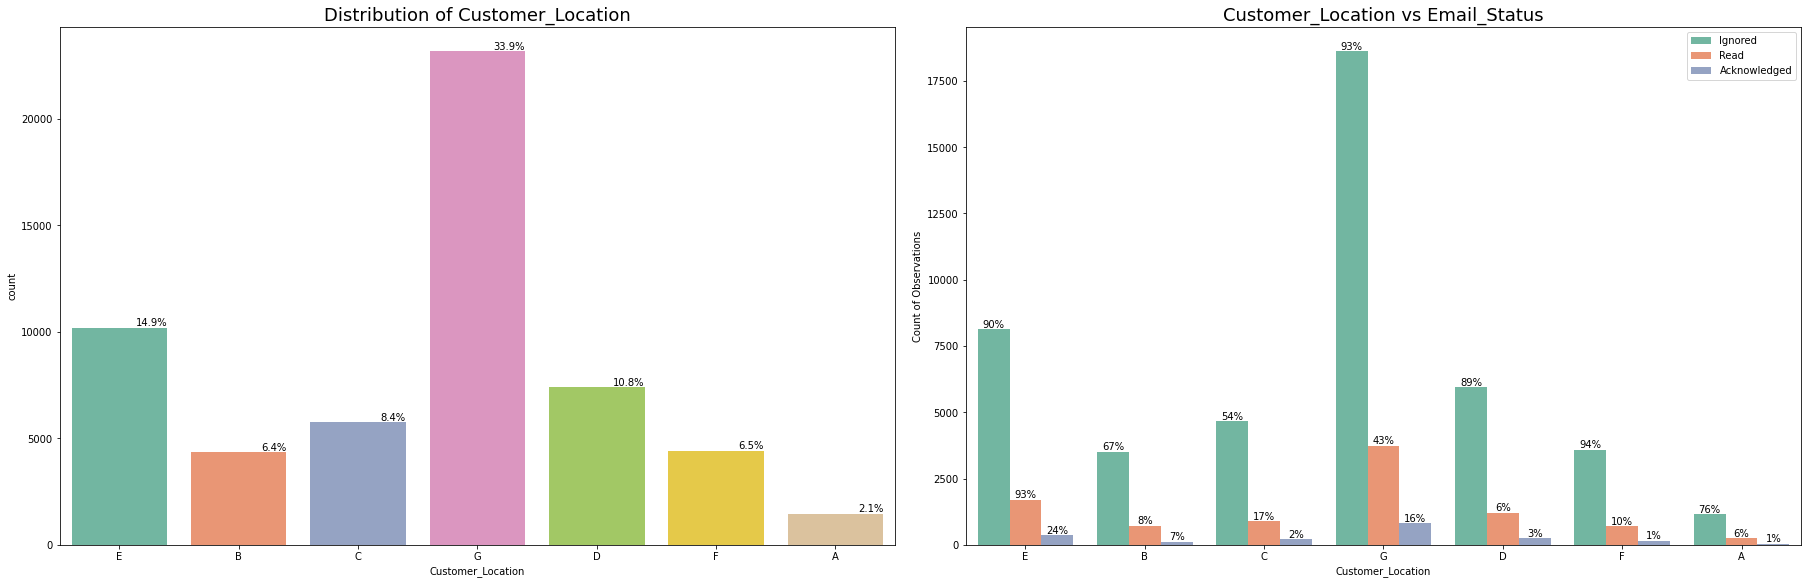

<Figure size 864x504 with 0 Axes>

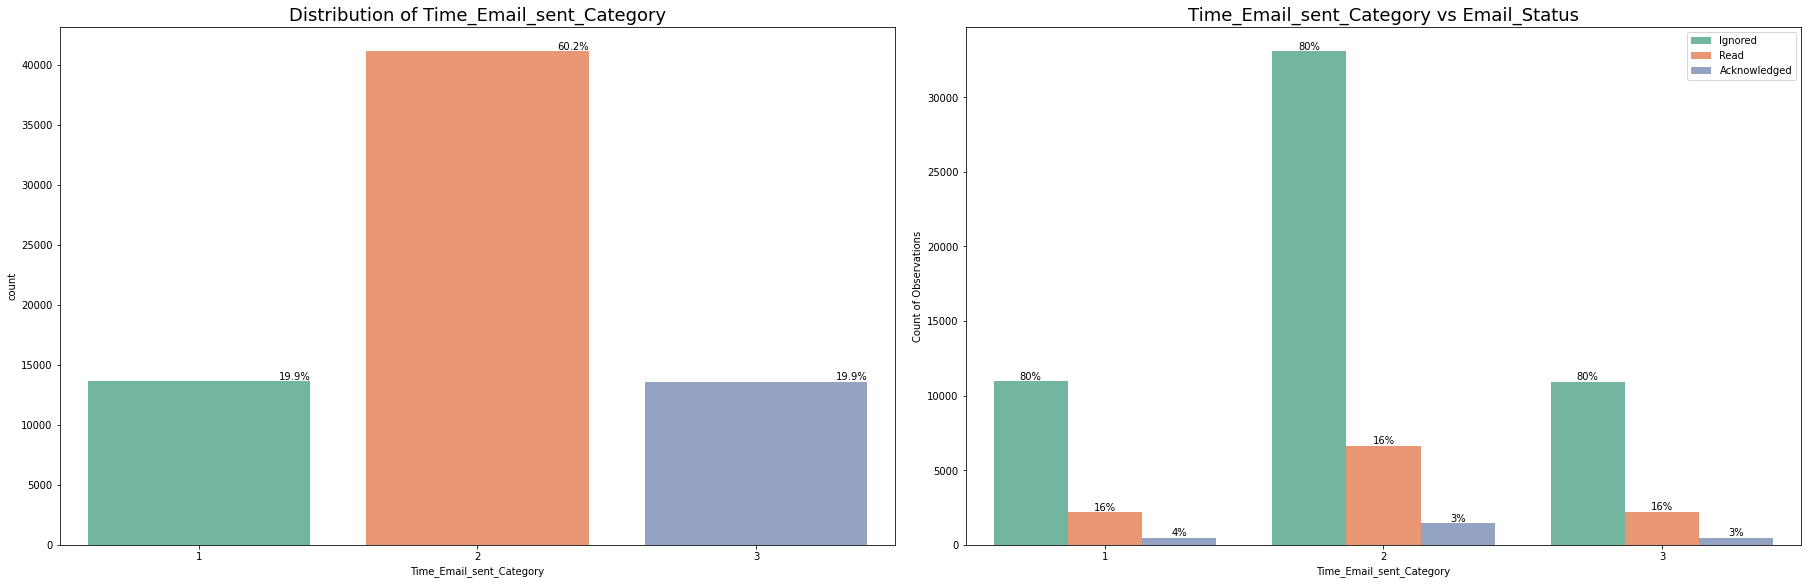

In [ ]:
for col in cat_feature:
  catcountplot(dataset, col, 'Email_Status', ['Ignored','Read', 'Acknowledged'])

##### 1. Why did you pick the specific chart?

Countplot is best for plotting Categorical variable, it is used to represent the occurrence(counts) of the observation present in the categorical variable. 

##### 2. What is/are the insight(s) found from the chart?

As we can observe that
* The percentage of each class in each categorical variable.
* The distribution of Email_Status is almost similar in all the categories except in Email_Campaign_Type we can see that it shows a totally different trend.
For Email_Campaign_Type=1 we see that no. of email ignored < no. of email acknowledged < no. of email Read

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights will help us in understanding the effectiveness of email campaign. Since campaign type 1 show more engagement if Company increases campaign type 1 then company moves in the direction of Positive growth.

if company increases campaign type 2 then company moves in the direction of negative growth.

### Chart - 4 -  Correlation Heatmap

#### Pearson correlation

Text(0.5, 1.0, 'Pearson Correlation')

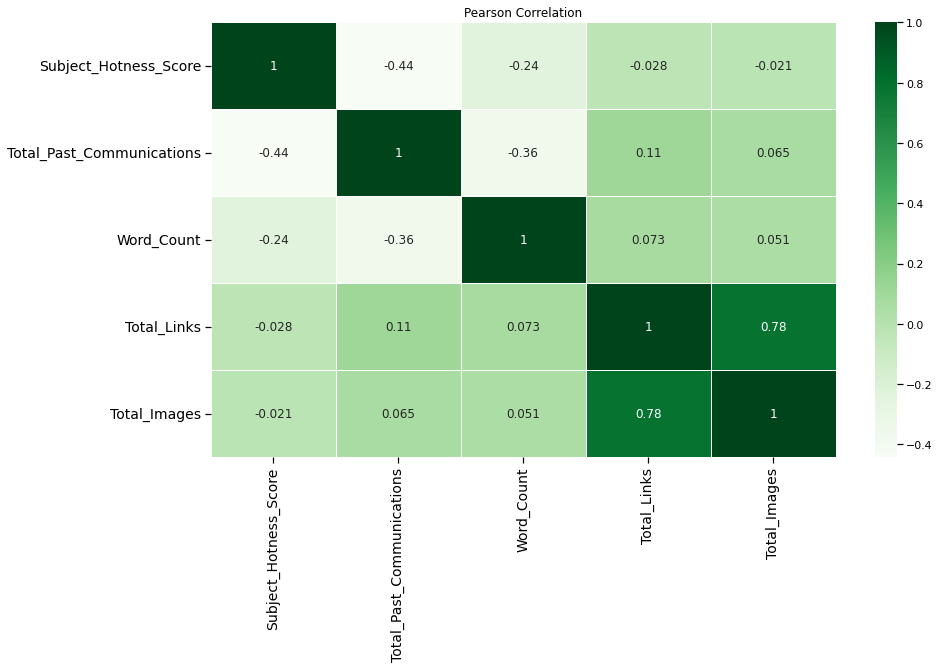

In [ ]:
# Correlation Heatmap visualization code
sns.set_context('notebook')
plt.figure(figsize = (14,8))
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
sns.heatmap(dataset[num_feature].corr(), annot=True,linewidth=.5,cmap="Greens")
plt.title("Pearson Correlation")

##### 1. Why did you pick the specific chart?

A correlation heatmap is a graphical representation of a correlation matrix representing the correlation between different variables. Each cell shows the correlation between two variables. The value of correlation can take any value from -1 to 1.

The Pearson correlation coefficient is used to measure the strength of a linear association between two numerical variables

Thus to know the correlation between all the numerical variables along with the correlation coeficients, i used Pearson correlation heatmap. 

##### 2. What is/are the insight(s) found from the chart?

By using Pearson correlation, we observed that There is a high positive correlation (i.e., 0.78 ) between Total links and Total image which causes multicollinearity. 

#### Spearman Correlation

Text(0.5, 1.0, 'Spearman Correlation')

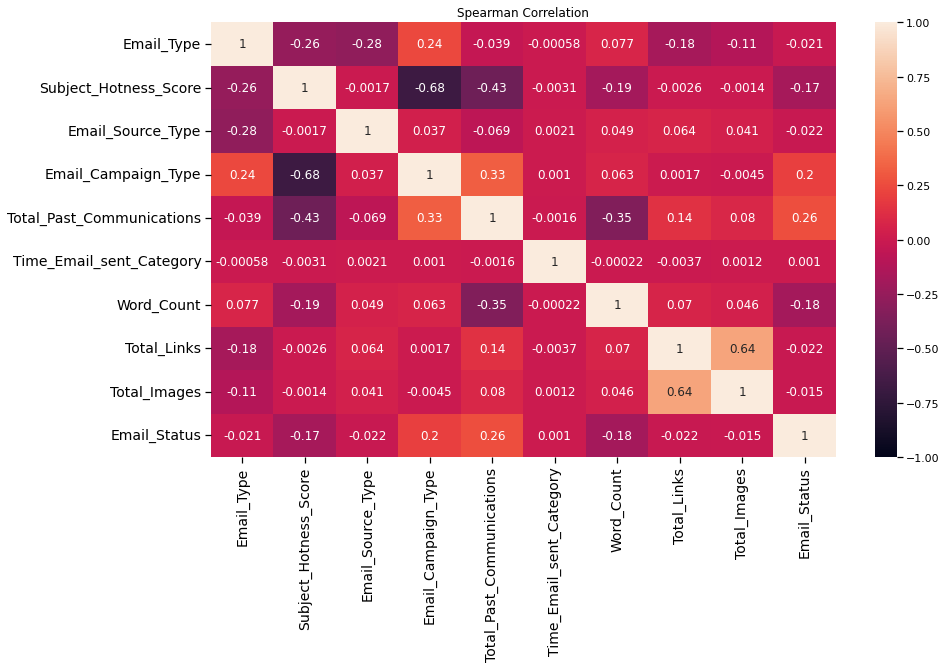

In [ ]:
import scipy.stats
plt.figure(figsize = (14,8))
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
heatmap= sns.heatmap(dataset.corr(method="spearman"),vmin= -1,vmax=1,annot=True)
plt.title("Spearman Correlation")

##### 1. Why did you pick the specific chart?

Correlation heatmaps can be used to find potential relationships between variables and to understand the strength of these relationships. The value of correlation can take any value from -1 to 1.

Spearman rank correlation is a non-parametric test that is used to measure the degree of association between two variables.

Thus to know the correlation between all the variables along with the correlation coeficients, i used Spearman correlation heatmap. 

##### 2. What is/are the insight(s) found from the chart?

By using Spearman correlation Heatmap, we observed that
* There is a high positive correlation (i.e., 0.64 ) between Total links and Total image.
* There is a high negative correlation (i.e., -0.68 ) between Email_Campaign_Type and Subject_hotness_score.
* As compare to all other variable, Total_Past_Communications has higher correlation with target variable (Email_Status).

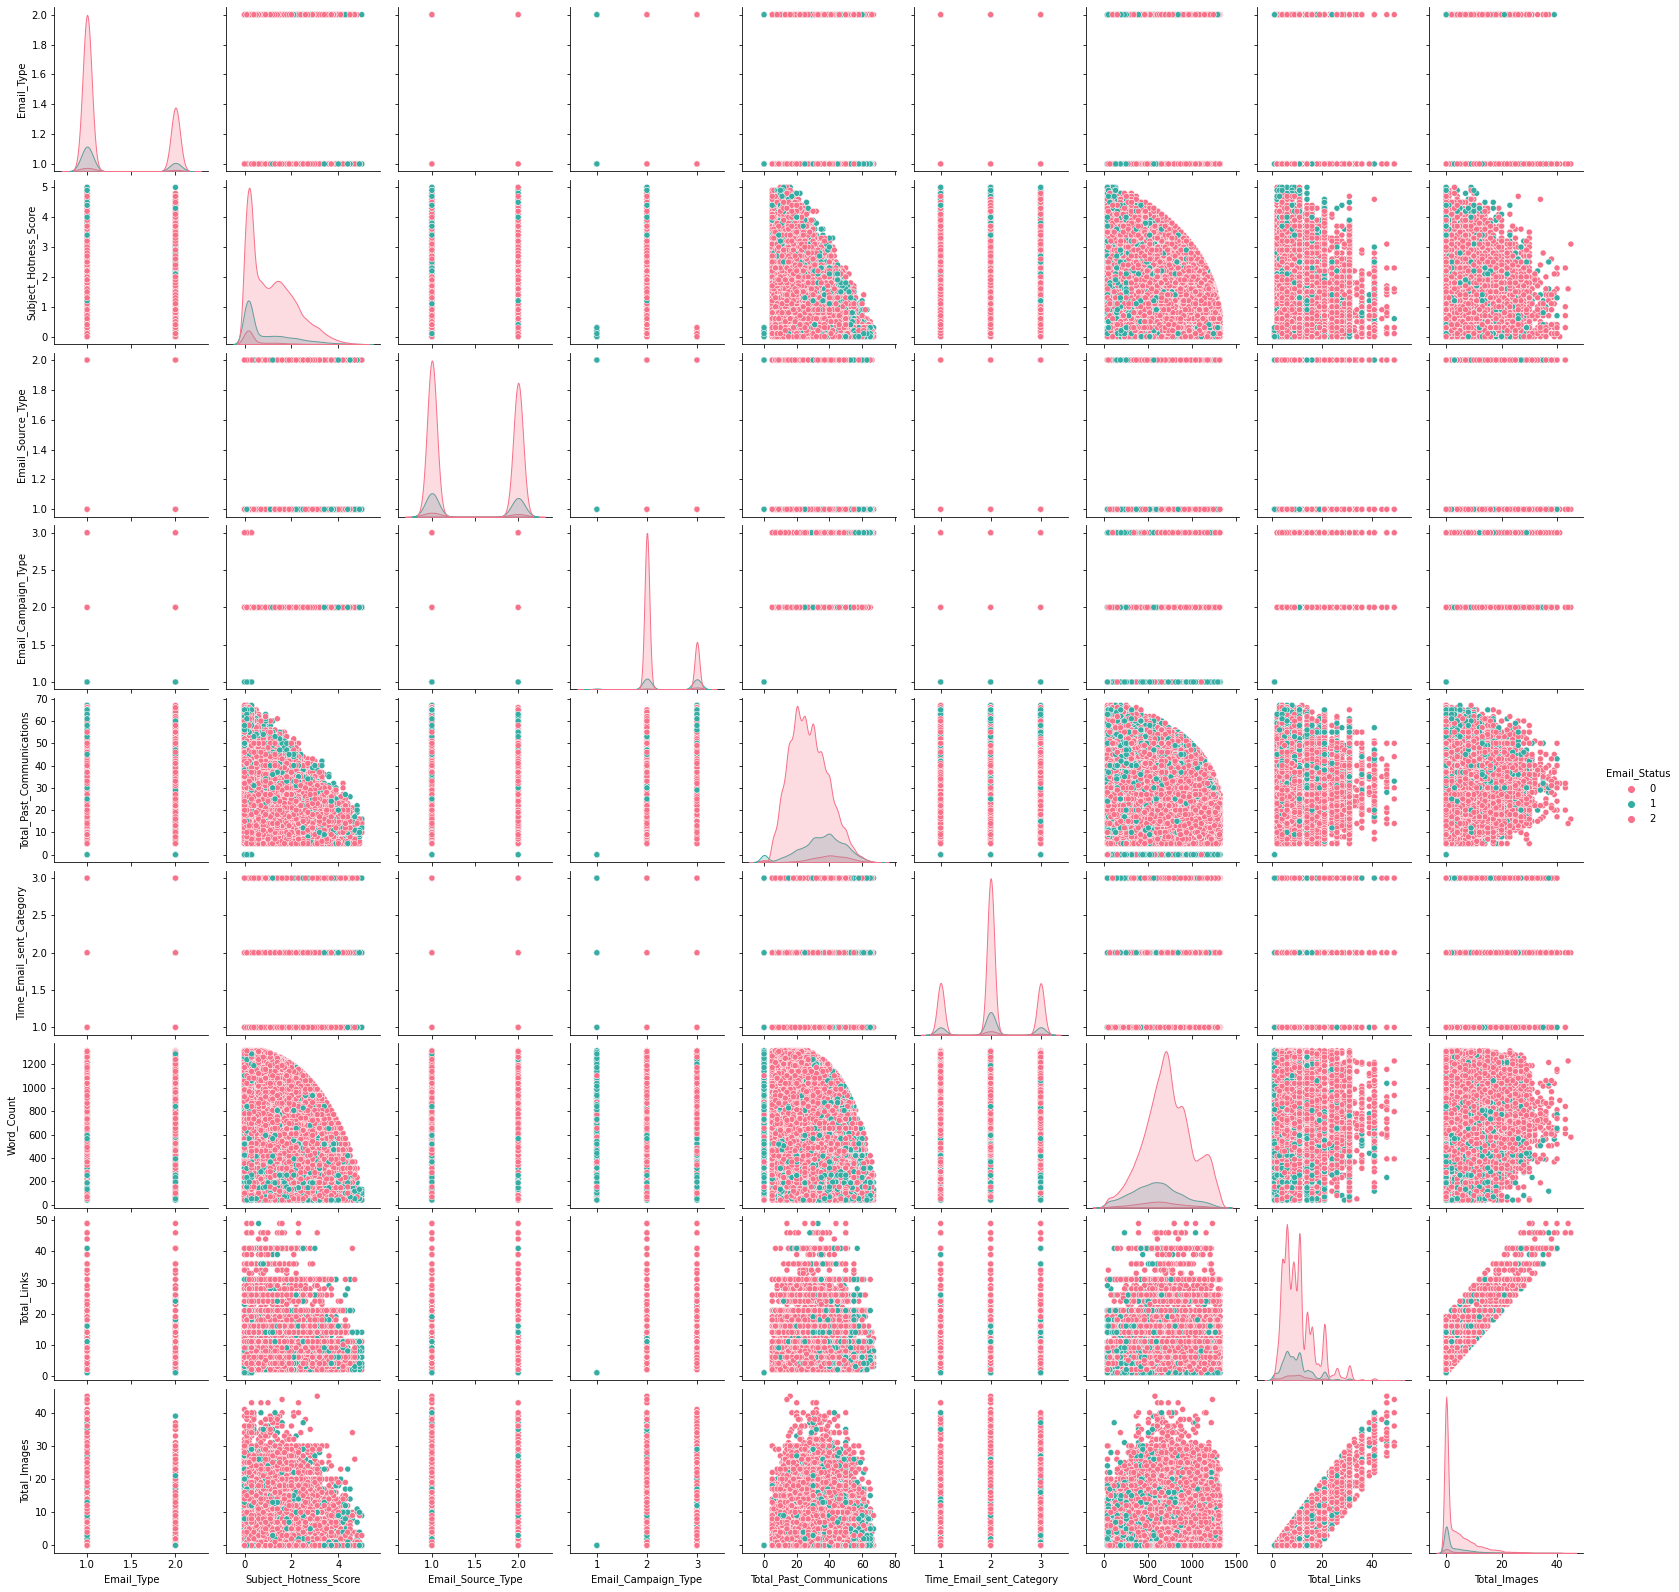

In [ ]:
#Pair Plot visualization code
sns.pairplot(dataset,hue ="Email_Status", diag_kind = "kde" ,kind = "scatter",palette = "husl")

##### 1. Why did you pick the specific chart?

Pair plot allows us to look at the diagonal distribution of these variable and on the non-diagonal linear relationship between the variables.

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. 

Thus, I used pair plot to analyse the patterns of data and relationship between the features. It's exactly same as the correlation heatmap but here you will get the graphical representation of it.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I got to know, there are less linear relationship between variables.

Total links and total image show some linear relation and we already know they are correlated as seen in earlier heatmap.

## **5. Hypothesis Testing**

### Based on chart experiments, define three hypothetical statements from the dataset. 

### Hypothetical Statement - 1 
---
Test whether a Total_Past_Communications has a Normal distribution.


#### 1. Research hypothesis as a null hypothesis and alternate hypothesis.


* Null Hypothesis H0: Total_Past_Communications has a normal distribution.

* Alternative Hypothesis H1: Total_Past_Communications does not have a normal distribution.
* Test Type : Shapiro-Wilk Test

###statistical test

In [ ]:
# Perform Statistical Test to obtain P-Value

# perform Shapiro-Wilk Normality Test
from scipy.stats import shapiro
stat, p = shapiro(dataset["Total_Past_Communications"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Null hypothesis is probably true, i.e. Total_Past_Communications has a normal distribution')
else:
 print('Null hypothesis is probably false, i.e Total_Past_Communications does not have a normal distribution.')

stat=nan, p=1.000
Null hypothesis is probably true, i.e. Total_Past_Communications has a normal distribution


##### Which statistical test have you done to obtain P-Value?

I used Shapiro-Wilk Test to obtain P-Value, to check whether a data has a Normal distribution.

##### Why did you choose the specific statistical test?

Shapiro-Wilk Test is the appropriate test for testing the normality of data. I used this test on Total_Past_Communications variable because it has the highest correlation with target variable (Email_Status) among all the numerical variable.

### Hypothetical Statement - 2
---
The Email_Type of the campaign will not have any significant impact on the Email_Status


###Define null hypothesis and alternate hypothesis.

* Null Hypothesis: There is no relationship between Email_Type and Email_Status.
* Alternative Hypothesis: There is a relationship between Email_Type and Email_Status.
* Test Type : chi-square test of independence.

###statistical test

In [ ]:
# Perform Statistical Test to obtain P-Value

# perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(pd.crosstab(dataset['Email_Type'], dataset['Email_Status']))

if p_value < 0.05:
    print("Reject the null hypothesis - the Email_Type has a significant impact on the Email_Status")
else:
    print("Fail to reject the null hypothesis - the Email_Type does not have a significant impact on the Email_Status")

Reject the null hypothesis - the Email_Type has a significant impact on the Email_Status


##### Which statistical test have you done to obtain P-Value?

For these hypothesis, I used chi-square test of independence which is a statistical test to determine whether there is a significant association between two categorical variables. In this case, the two variables are Email_Type and Email_Status. 

##### Why did you choose the specific statistical test?

This test is appropriate for the determination of existence of any relationship between the two categorical variable.

### Hypothetical Statement - 3
---
The Customer_Location will not have any significant impact on the Total_Links, Total_Images and Total_Past_Communications in the email

Define null hypothesis and alternate hypothesis.

* Null Hypothesis: The mean of Total_Links is equal among the location (A, B, C, D, E, F, G) (H0: μ1 = μ2 = μ3 = μ4 = μ5 = μ6 = μ7)
* Alternative Hypothesis: The mean of Total_Links is not equal among the location (A, B, C, D, E, F, G) (H1: at least one mean is different from the others)
* Test Type : ANOVA Test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# perform ANOVA test
f_value, p_value = stats.f_oneway(dataset[dataset['Customer_Location'] == 'A']['Total_Links'], 
                                  dataset[dataset['Customer_Location'] == 'B']['Total_Links'],
                                  dataset[dataset['Customer_Location'] == 'C']['Total_Links'],
                                  dataset[dataset['Customer_Location'] == 'D']['Total_Links'], 
                                  dataset[dataset['Customer_Location'] == 'E']['Total_Links'],
                                  dataset[dataset['Customer_Location'] == 'F']['Total_Links'],
                                  dataset[dataset['Customer_Location'] == 'G']['Total_Links'])
if p_value < 0.05:
    print("Reject the null hypothesis - the Customer_Location has a significant impact on the Total_Links in the email")
else:
    print("Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Links in the email")


Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Links in the email


In [ ]:
# Perform Statistical Test to obtain P-Value
# perform ANOVA test
f_value, p_value = stats.f_oneway(dataset[dataset['Customer_Location'] == 'A']['Total_Images'], 
                                  dataset[dataset['Customer_Location'] == 'B']['Total_Images'],
                                  dataset[dataset['Customer_Location'] == 'C']['Total_Images'],
                                  dataset[dataset['Customer_Location'] == 'D']['Total_Images'], 
                                  dataset[dataset['Customer_Location'] == 'E']['Total_Images'],
                                  dataset[dataset['Customer_Location'] == 'F']['Total_Images'],
                                  dataset[dataset['Customer_Location'] == 'G']['Total_Images'])
if p_value < 0.05:
    print("Reject the null hypothesis - the Customer_Location has a significant impact on the Total_Images in the email")
else:
    print("Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Images in the email")


Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Images in the email


In [ ]:
# Perform Statistical Test to obtain P-Value
# perform ANOVA test
f_value, p_value = stats.f_oneway(dataset[dataset['Customer_Location'] == 'A']['Total_Past_Communications'], 
                                  dataset[dataset['Customer_Location'] == 'B']['Total_Past_Communications'],
                                  dataset[dataset['Customer_Location'] == 'C']['Total_Past_Communications'],
                                  dataset[dataset['Customer_Location'] == 'D']['Total_Past_Communications'], 
                                  dataset[dataset['Customer_Location'] == 'E']['Total_Past_Communications'],
                                  dataset[dataset['Customer_Location'] == 'F']['Total_Past_Communications'],
                                  dataset[dataset['Customer_Location'] == 'G']['Total_Past_Communications'])
if p_value < 0.05:
    print("Reject the null hypothesis - the Customer_Location has a significant impact on the Total_Past_Communications in the email")
else:
    print("Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Past_Communications in the email")


Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Past_Communications in the email


##### Which statistical test have you done to obtain P-Value?

For this hypothesis, I used ANOVA (Analysis of Variance) test to abtain P-Value because ANOVA is a statistical test that is used to determine whether there is a statistically significant difference in the means of two or more groups.

##### Why did you choose the specific statistical test?

ANOVA test is used to determine if there are significant difference between the means of two or more groups. In this case, we have different locations (A,B,C,D,E,F,G) and we want to determine if there is a significant difference in the means of Total_Links, Total_Images and Total_Past_Communications among these groups. 

ANOVA is appropriate test for this case because the variables Total_Links, Total_Images and Total_Past_Communications are continuous and we want to compare the means of multiple groups.

## **6. Feature Engineering & Data Pre-processing**

Feature engineering is the pre-processing step of machine learning, which is used to transform raw data into features that can be used for creating a predictive model using Machine learning or statistical Modelling. Feature engineering in machine learning aims to improve the performance of models.

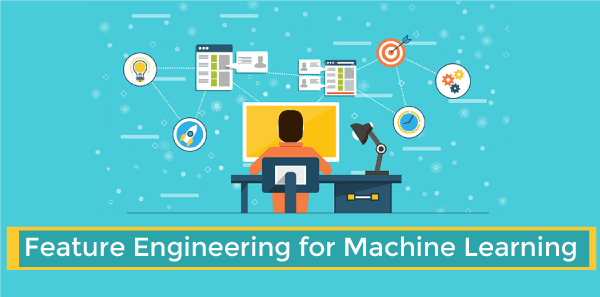

---

### 1. Handling Missing Values

---

Missing values can be handled by deleting the rows or columns having null values. If columns have more than half of the rows as null then the entire column can be dropped. The rows which are having one or more columns values as null can also be dropped.

In cases where there are a small number of missing observations, Mean, Median and Mode is one of the most common methods of imputing values when dealing with missing data. 

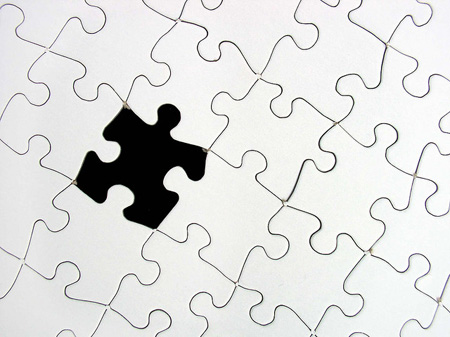

In [ ]:
## Lets go and see the percentage of missing values
dataset.isnull().mean()*100

Email_Type                    0.000000
Subject_Hotness_Score         0.000000
Email_Source_Type             0.000000
Customer_Location            16.963411
Email_Campaign_Type           0.000000
Total_Past_Communications     9.984931
Time_Email_sent_Category      0.000000
Word_Count                    0.000000
Total_Links                   3.220049
Total_Images                  2.453440
Email_Status                  0.000000
dtype: float64

In [ ]:
#divide columns on the basis of percentage of missing values.
null_percent_col=dataset.isnull().mean()[dataset.isnull().mean()>0]
null_percentl_col=null_percent_col[null_percent_col.values<0.05]
null_percenth_col=dataset.isnull().mean()[dataset.isnull().mean()>0.05]

In [ ]:
#summary about columns on the basis of percentage of missing values.
print(f"There are {len(null_percent_col.index)} columns {null_percent_col.index.values}  having null values and  the columns which have less than 5% null values are {null_percentl_col.index.values} \n and more than 5% null values are {null_percenth_col.index.values}")

There are 4 columns ['Customer_Location' 'Total_Past_Communications' 'Total_Links'
 'Total_Images']  having null values and  the columns which have less than 5% null values are ['Total_Links' 'Total_Images'] 
 and more than 5% null values are ['Customer_Location' 'Total_Past_Communications']


when the percentage of missing data in column is high, then we remove that column. Hence I drop the column 'Customer_Location'.

In [ ]:
dataset2=dataset.drop(columns=['Customer_Location'])

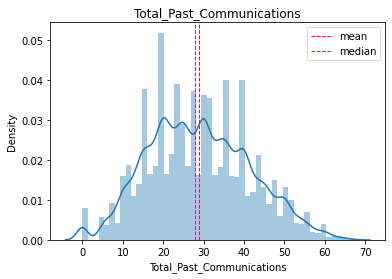

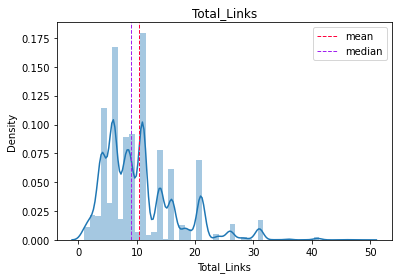

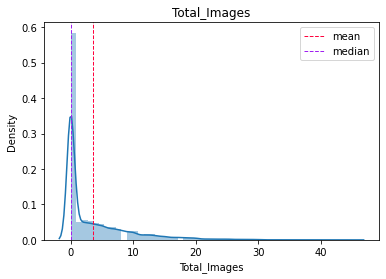

In [ ]:
#checking distribution of other null value to find correct way to impute
for cat in ['Total_Past_Communications','Total_Links','Total_Images']:
  sns.distplot(dataset2[cat], hist= True);
  feature = dataset2[cat]
  plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=1,label= 'mean');  #red
  plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=1,label='median'); #cyan
  plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
  plt.title(f'{cat.title()}');
  plt.xlabel(cat)
  plt.show()
  print('='*120)

Since, all the variables are positively skewed hence we fill median in place of null variable present in the variable because it is not influenced by the outliers.

In [ ]:
dataset2["Total_Links"].fillna(dataset2["Total_Links"].median(),inplace=True)
dataset2["Total_Images"].fillna(dataset2["Total_Images"].median(),inplace=True)
dataset2["Total_Past_Communications"].fillna(dataset2["Total_Past_Communications"].median(),inplace=True)

In [ ]:
## Again check the percentage of missing values
dataset2.isnull().sum().mean()*100

0.0

#### What all missing value imputation techniques have you used and why did you use those techniques?

Missing value imputation techniques deals with replacing the null value by  measures of central tendency. The Most commonly used measures of central tendency are the mean, median, and mode. 

I replace the null values with median in all the variable because all the variables are positively skewed and The median is the value in the middle of a dataset i.e., it is not influenced by the outliers.



---
### 2. Handling Outliers
---

One of the most important steps as part of data preprocessing is detecting and treating the outliers as they can negatively affect the statistical analysis and the training process of a machine learning algorithm resulting in lower accuracy.

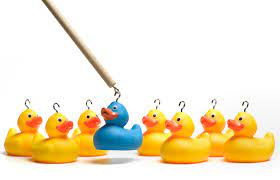

In [ ]:
# Importing scipy
import scipy
#Find Skewness in all numerical variable
skewness= [{num_col:scipy.stats.skew(dataset2[num_col])} for num_col in num_feature ]
skewness

[{'Subject_Hotness_Score': 0.8976826167024007},
 {'Total_Past_Communications': 0.24875904055173303},
 {'Word_Count': 0.012805348013819265},
 {'Total_Links': 1.4267516431080323},
 {'Total_Images': 2.1290649303131772}]

####Distribution on the basis of skewness value:

* Skewness = 0: Then normally distributed.
* Skewness > 0: Then more weight in the left tail of the distribution.
* Skewness < 0: Then more weight in the right tail of the distribution.

In [ ]:
# For Skew Symmetric features defining upper and lower boundary
#Outer Fence
def outlier_treatment_skew(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)-1.5*IQR
  upper_bridge =df[feature].quantile(0.75)+1.5*IQR
  # print(f'feature: {feature} IQR:{IQR} lower: {lower_bridge} upper:{upper_bridge}')
  return upper_bridge,lower_bridge

In [ ]:
#define num of outliers
num_of_outliers=[{feature:dataset2[(dataset2[feature] > outlier_treatment_skew(dataset2,feature)[0]) | (dataset2[feature] < outlier_treatment_skew(dataset2,feature)[1])].shape[0]} for feature in num_feature if feature!='Word_Count']

In [ ]:
#number of outliers in each numerical variable
num_of_outliers

[{'Subject_Hotness_Score': 247},
 {'Total_Past_Communications': 136},
 {'Total_Links': 1608},
 {'Total_Images': 5585}]

In [ ]:
#outliers detection
total_outliers=[dataset2[(dataset2[feature] > outlier_treatment_skew(dataset2,feature)[0]) | (dataset2[feature] < outlier_treatment_skew(dataset2,feature)[1])].index for feature in num_feature]

In [ ]:
#index of outliers in each numerical variable
total_outliers

[Int64Index([  426,   481,   699,   987,   991,  1307,  1672,  2291,  2295,
              3171,
             ...
             65831, 65956, 66325, 66357, 66431, 66551, 66760, 66823, 67100,
             68215],
            dtype='int64', length=247),
 Int64Index([  932,  1427,  1613,  1767,  2350,  2893,  3640,  3677,  3832,
              3863,
             ...
             65076, 65182, 65257, 66002, 66047, 66064, 66144, 66443, 67346,
             67359],
            dtype='int64', length=136),
 Int64Index([], dtype='int64'),
 Int64Index([   24,   107,   126,   161,   179,   226,   345,   370,   414,
               481,
             ...
             68113, 68159, 68198, 68199, 68210, 68243, 68255, 68264, 68291,
             68349],
            dtype='int64', length=1608),
 Int64Index([   11,    14,    17,    24,    46,    52,    62,   101,   103,
               107,
             ...
             68267, 68271, 68272, 68278, 68280, 68288, 68291, 68345, 68348,
             68349],
       

In [ ]:
#use union operator to merge the index of outliers which are in different numerical variable to get the entire index of outliers
outliers_index=total_outliers[0]| total_outliers[1]|total_outliers[2]|total_outliers[3]|total_outliers[4]

In [ ]:
#remove the outliers from the dataset to make better prediction
dataset3=dataset2.drop(outliers_index,axis=0)

In [ ]:
#before removal of outliers
print(f"number of rows are {dataset2.shape[0]} before removal of outliers")

number of rows are 68353 before removal of outliers


In [ ]:
#after removal of outliers
print(f"number of rows are {dataset3.shape[0]} before removal of outliers")

number of rows are 62257 before removal of outliers


##### What all outlier treatment techniques have you used and why did you use those techniques?

Initially, I find Skewness for each numerical variable in order to know about distribution of the variable, hence we got to know that all variables are positively skewed except Word_Count i.e., there are some outliers present in the variable. To remove those outliers, I choose to use trimming technique which excludes the outlier values.

I used this technique because it improved the quality of the dataset and enhance the accuracy and stability of statistical models.

### 3. Categorical Encoding

Categorical Encoding is a process where we transform categorical data into numerical data.

In [ ]:
cat_features= set(cat_feature)-{'Customer_Location'}

In [ ]:
dataset4=pd.get_dummies(dataset3, columns=cat_features, drop_first=True).reset_index().drop(columns=["index"])
dataset4.head()

Subject_Hotness_Score  Total_Past_Communications  Word_Count  Total_Links  \
0                    2.2                       33.0         440          8.0   
1                    2.1                       15.0         504          5.0   
2                    0.1                       36.0         962          5.0   
3                    3.0                       25.0         610         16.0   
4                    0.0                       18.0         947          4.0   

   Total_Images  Email_Status  Time_Email_sent_Category_2  \
0           0.0             0                           0   
1           0.0             0                           1   
2           0.0             1                           1   
3           0.0             0                           1   
4           0.0             0                           1   

   Time_Email_sent_Category_3  Email_Campaign_Type_2  Email_Campaign_Type_3  \
0                           0                      1                      0   
1                           0                      1                      0   
2                           0                      0                      1   
3                           0                      1                      0   
4                           0                      0                      1   

   Email_Type_2  Email_Source_Type_2  
0             0                    1  
1             1                    0  
2             1                    0  
3             0                    1  
4             0                    1

In [ ]:
dataset4.shape

(62257, 12)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Here I have used one hot encoding technique on categorial feature for transforming categorical data into numerical, where all the variables are nominal.

I used One hot encoding because it makes our data more useful and expressive, and it can be rescaled easily.

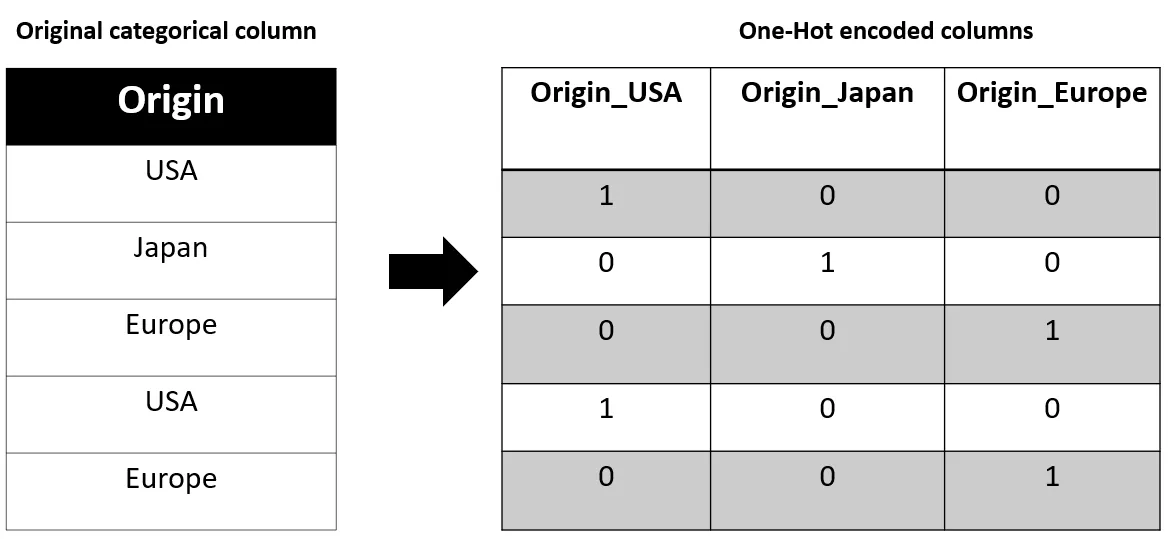

### 4. Feature Manipulation & Selection



#### 1. Feature Manipulation

We previously saw that there are highly correlated numeric features. 'Total_Links' and 'Total_Images'. We can combine these two features to create a new feature and drop the original features.

In [ ]:
# creating a new column called Total_link_Lmages
dataset4['Total_link_Images'] = dataset4['Total_Links'] + dataset4['Total_Images']

In [ ]:
# dropping the two original columns
dataset4.drop(columns=['Total_Links','Total_Images'],inplace= True)

In [ ]:
#after manipulation
dataset4.head()

Subject_Hotness_Score  Total_Past_Communications  Word_Count  Email_Status  \
0                    2.2                       33.0         440             0   
1                    2.1                       15.0         504             0   
2                    0.1                       36.0         962             1   
3                    3.0                       25.0         610             0   
4                    0.0                       18.0         947             0   

   Time_Email_sent_Category_2  Time_Email_sent_Category_3  \
0                           0                           0   
1                           1                           0   
2                           1                           0   
3                           1                           0   
4                           1                           0   

   Email_Campaign_Type_2  Email_Campaign_Type_3  Email_Type_2  \
0                      1                      0             0   
1                      1                      0             1   
2                      0                      1             1   
3                      1                      0             0   
4                      0                      1             0   

   Email_Source_Type_2  Total_link_Images  
0                    1                8.0  
1                    0                5.0  
2                    0                5.0  
3                    1               16.0  
4                    1                4.0

#### 2. Feature Selection

In [ ]:
#Independent variables
col=set(dataset4.columns.values)-{"Email_Status"}
col

{'Email_Campaign_Type_2',
 'Email_Campaign_Type_3',
 'Email_Source_Type_2',
 'Email_Type_2',
 'Subject_Hotness_Score',
 'Time_Email_sent_Category_2',
 'Time_Email_sent_Category_3',
 'Total_Past_Communications',
 'Total_link_Images',
 'Word_Count'}

In [ ]:
from  sklearn.feature_selection import VarianceThreshold
var_thres= VarianceThreshold(threshold=0.05)
var_thres.fit(dataset4[col])
useless_col=[col for result in var_thres.get_support()if result!=True]
useless_col

[]

In [ ]:
#Multicollinearity by VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(dataset4[[i for i in col]])

variables        VIF
0           Total_link_Images   3.828640
1       Subject_Hotness_Score   5.094305
2       Email_Campaign_Type_3  14.172221
3                Email_Type_2   1.727146
4  Time_Email_sent_Category_2   3.886310
5         Email_Source_Type_2   2.005094
6       Email_Campaign_Type_2  36.441867
7   Total_Past_Communications  12.534923
8                  Word_Count  10.366943
9  Time_Email_sent_Category_3   1.951694

In [ ]:
calc_vif(dataset4[[i for i in col if i not in ["Email_Campaign_Type_2"]]])

variables       VIF
0           Total_link_Images  3.714204
1       Subject_Hotness_Score  2.589437
2       Email_Campaign_Type_3  2.224790
3                Email_Type_2  1.648326
4  Time_Email_sent_Category_2  3.727933
5         Email_Source_Type_2  1.965784
6   Total_Past_Communications  5.046626
7                  Word_Count  5.205952
8  Time_Email_sent_Category_3  1.896129

In [ ]:
new_num_features=calc_vif(dataset4[[i for i in col if i not in ["Email_Campaign_Type_2"]]]).variables.values

In [ ]:
dataset4.drop(columns=["Email_Campaign_Type_2"],inplace=True)

##### What all feature selection methods have you used  and why?

The variance threshold is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. In our dataset, There is no features whose variance does not meet threshold that is 0.05.

I Calculate Variance Inflation Factor (VIF) which help us in the detection of multicollinearity in the data. I found some features having VIF of more than 5-10 and I considered it to be 6 then I dropped the multicolinear feature ["Email_Campaign_Type_2","Customer_Location_G"] to make the VIF less than 6. 

####I used these feature selection methods, because of the following reason:-

1) if Variance in feature does not meet threshold, then that feature is less relevant for study and we know that, **lesser the features, better the model**. so, i dropped that feature.

2) Since logistic regression has an assumption that there is no multicollinearity between the independent variables. so, I dropped the multicolinear feature from my dataset.


##### Which all features you found important and why?

In [ ]:
# Embedded Method of validating the feature importances of selected features
from sklearn.ensemble import RandomForestClassifier
def randomforest_embedded(x,y):
  # Create the random forest eith hyperparameters
  model= RandomForestClassifier(n_estimators=550)
  # Fit the mmodel
  model.fit(x,y)
  # get the importance of thr resulting features
  importances= model.feature_importances_
  # Create a data frame for visualization
  final_df= pd.DataFrame({"Features": pd.DataFrame(x).columns, "Importances": importances})
  final_df.set_index('Importances')
  # Sort in ascending order to better visualization
  final_df= final_df.sort_values('Importances')
  return final_df

In [ ]:
# Getting feature importance of selected features
randomforest_embedded(x=dataset4[new_num_features],y=dataset4["Email_Status"])

Features  Importances
3                Email_Type_2     0.013677
8  Time_Email_sent_Category_3     0.017311
5         Email_Source_Type_2     0.022038
4  Time_Email_sent_Category_2     0.024729
2       Email_Campaign_Type_3     0.031627
1       Subject_Hotness_Score     0.153375
0           Total_link_Images     0.217079
6   Total_Past_Communications     0.226415
7                  Word_Count     0.293749

Drop the columns which are insignificant for our dataset.

In [ ]:
drop=['Time_Email_sent_Category_3',"Email_Type_2"]
dataset4.drop(drop,inplace=True,axis=1)

### 5. Data Transformation

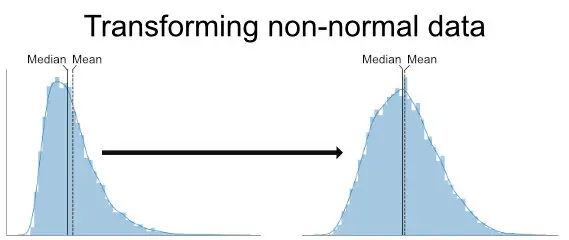

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Lets check our data needs any transformation or not.

In [ ]:
# Transform Your data
# Getting symmetric and skew symmetric features from the columns
symmetric_feature=[]
non_symmetric_feature=[]
for i in dataset4.describe().columns.values:
  if abs(dataset4[i].mean()-dataset4[i].median())<0.1:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - []
Skew Symmetric Distributed Features : - ['Subject_Hotness_Score', 'Total_Past_Communications', 'Word_Count', 'Email_Status', 'Time_Email_sent_Category_2', 'Email_Campaign_Type_3', 'Email_Source_Type_2', 'Total_link_Images']


Since, all features have skew symmetric distribution, hence our data needs to be transforms.

Primarily I plot the probability plot which is a graphical technique for assessing whether or not a dataset follows a normal distribution. The data are plotted against a theoretical distribution in such a way that the points should form approximately a straight line.

if the points form approximately a straight line then, we said that dataset follows a normal distribution. otherwise, it does not follow a normal distribution. 

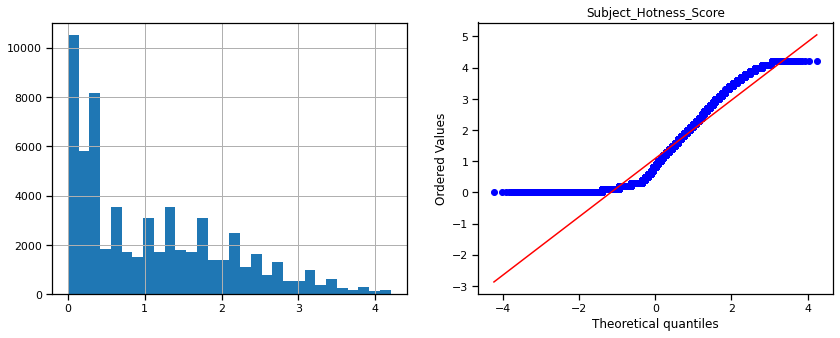

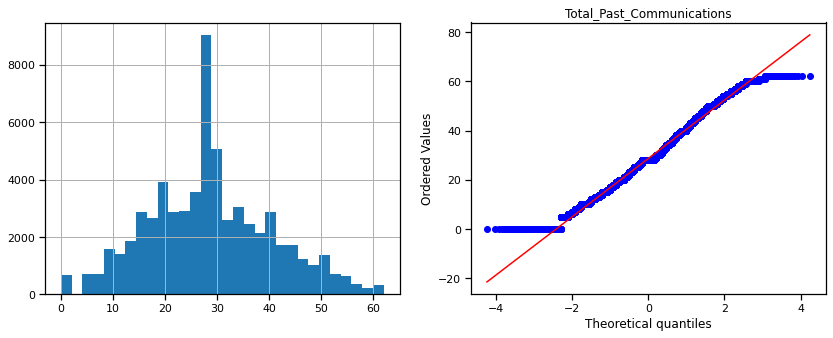

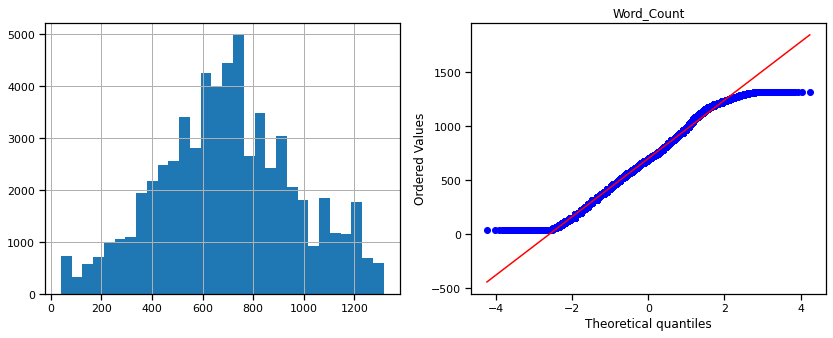

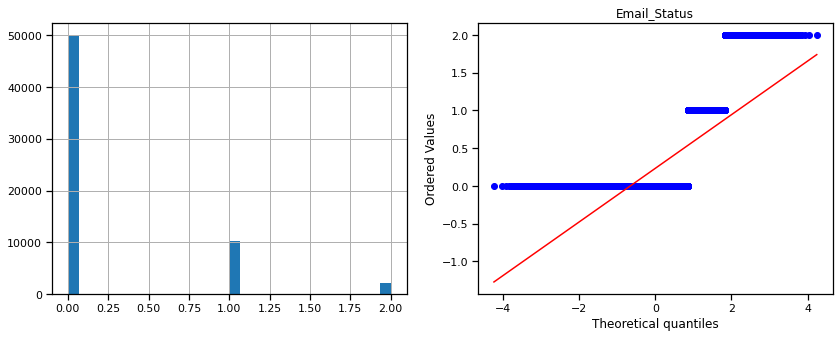

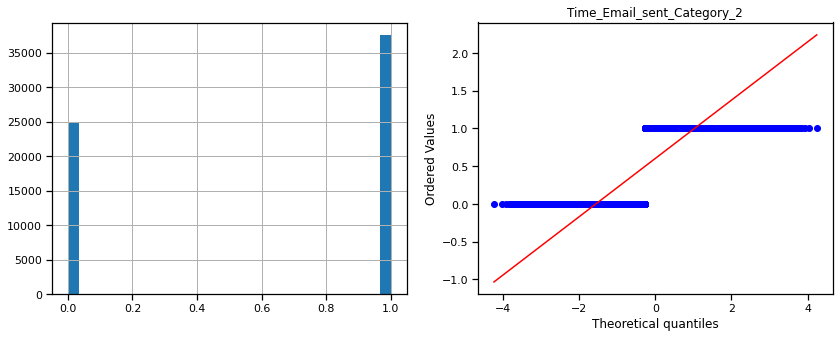

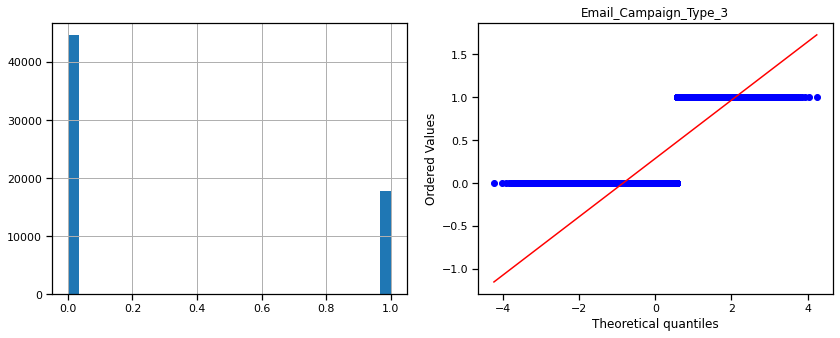

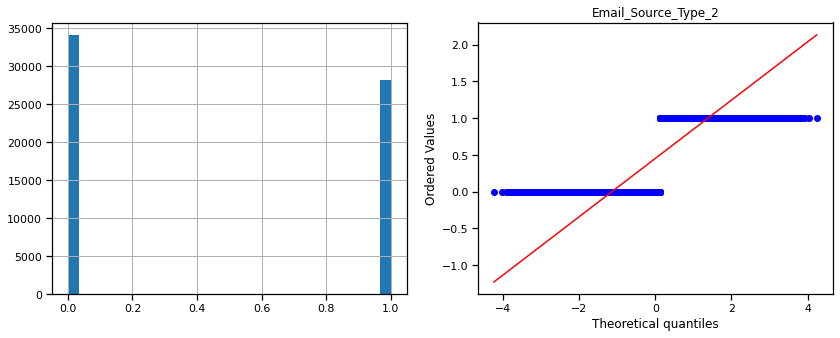

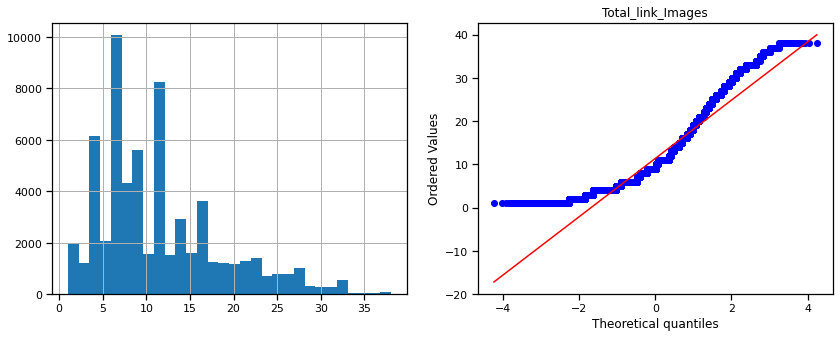

In [ ]:
#vizualization 
from scipy.stats import *
from scipy import stats

for variable in non_symmetric_feature:
  sns.set_context('notebook')
  plt.figure(figsize=(14,5))
  plt.subplot(1,2,1)   #means 1 row, 2 Columns and 1st plot
  dataset4[variable].hist(bins=30)

  ##QQ plot
  plt.subplot(1,2,2)
  stats.probplot(dataset4[variable], dist='norm',plot=plt)
  plt.title(variable)
  plt.show()
  print('='*120)

In [ ]:
# since categorial feature does not required transformation hence take continuous feature
for col in ['Total_Past_Communications','Word_Count',"Total_link_Images","Subject_Hotness_Score"]:
  #doing square root transformation
  dataset4[col]=np.sqrt(dataset4[col])

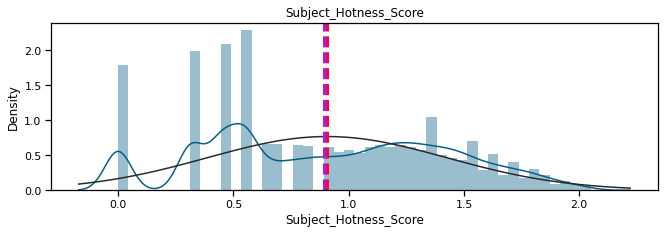

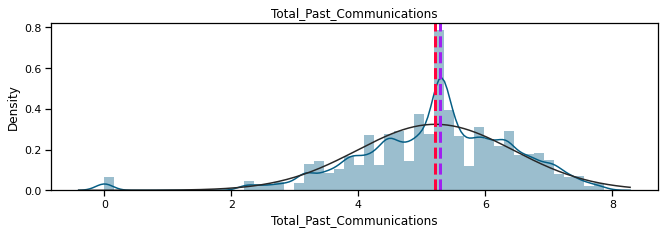

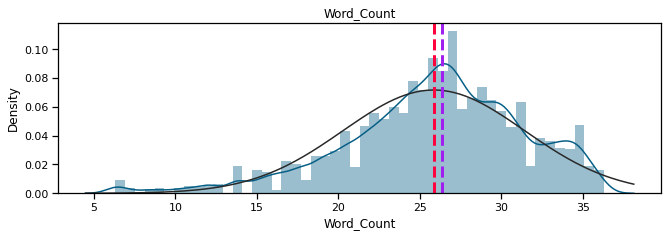

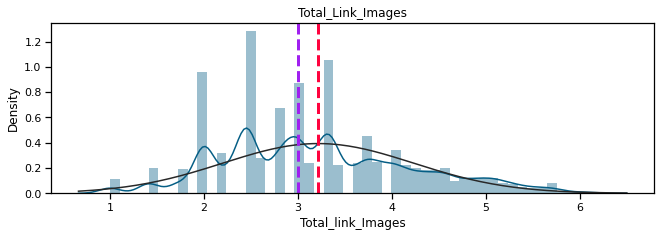

In [ ]:
#draw the distribution plot of transform features with the value of mean and median.
for i,col in enumerate(['Subject_Hotness_Score','Total_Past_Communications','Word_Count',"Total_link_Images"]) :
    plt.figure(figsize = (18,18))
    plt.subplot(6,2,i+1);
    sns.distplot(dataset4[col], color = '#055E85', fit = norm);
    feature = dataset4[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.title(f'{col.title()}');
    plt.tight_layout();

I used square-root transformation in all continuous features because all are moderately skew.

### 6. Data Scaling



If the ranges of features have large difference then we should use feature scaling which help us in getting all the features in similar range.

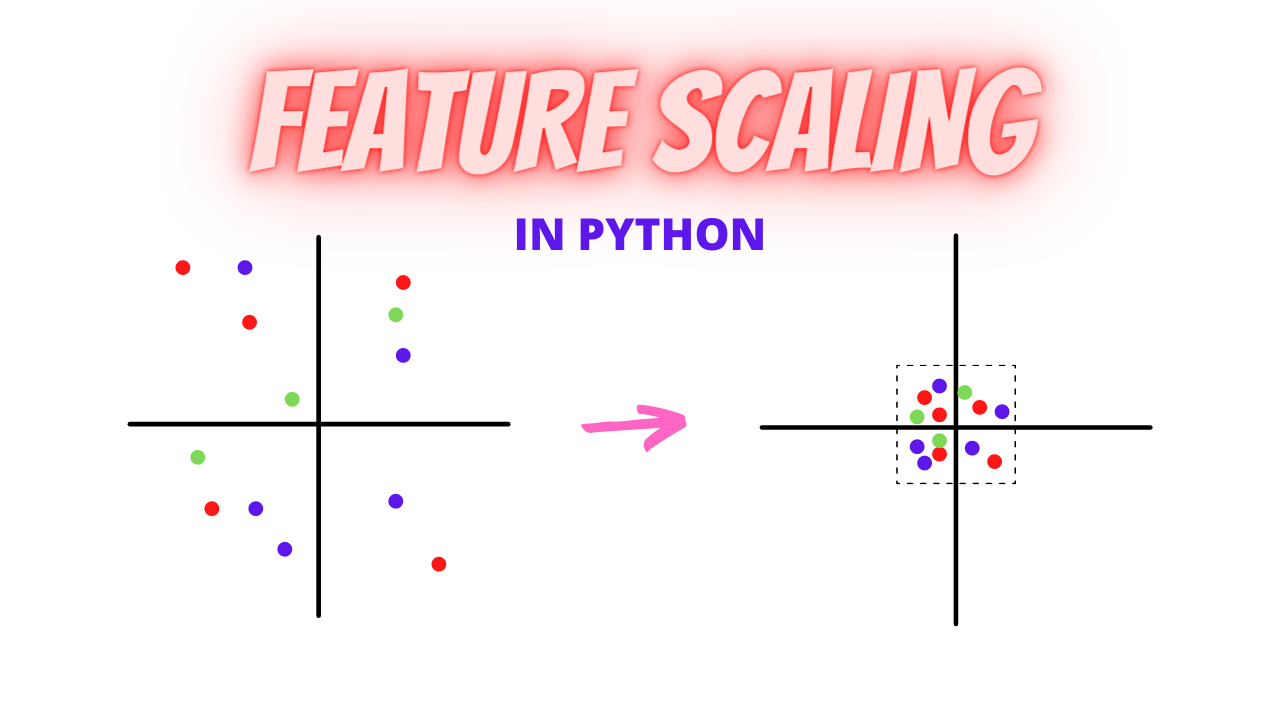


In [ ]:
dataset4.head(2)

Subject_Hotness_Score  Total_Past_Communications  Word_Count  Email_Status  \
0               1.483240                   5.744563   20.976177             0   
1               1.449138                   3.872983   22.449944             0   

   Time_Email_sent_Category_2  Email_Campaign_Type_3  Email_Source_Type_2  \
0                           0                      0                    1   
1                           1                      0                    0   

   Total_link_Images  
0           2.828427  
1           2.236068

In [ ]:
#standard scaler
from sklearn.preprocessing import StandardScaler
for col in ['Subject_Hotness_Score','Total_Past_Communications','Word_Count',
            'Total_link_Images']:
  dataset4[col] = StandardScaler().fit_transform(dataset4[col].values.reshape(-1, 1))

In [ ]:
dataset4.head(2)

Subject_Hotness_Score  Total_Past_Communications  Word_Count  Email_Status  \
0               1.112516                   0.432234   -0.875882             0   
1               1.046771                  -1.086920   -0.611137             0   

   Time_Email_sent_Category_2  Email_Campaign_Type_3  Email_Source_Type_2  \
0                           0                      0                    1   
1                           1                      0                    0   

   Total_link_Images  
0          -0.382164  
1          -0.966191

##### Which method have you used to scale you data and why?



Basically,
 we use Standardization when your data follows Gaussian distribution and use Normalization when your data does not follow Gaussian distribution.

Since all of numerical features are almost normal distributed, hence I applied standard scaler to scale the features.






### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

This dataset doesnot need any dimensionality reduction.

Dimensionality reduction is a technique that is used to reduce the number of features in a dataset. It is often used when the number of features is very large, as this can lead to problems such as overfitting and slow computation. There are a variety of techniques that can be used for dimensionality reduction, such as principal component analysis (PCA) and singular value decomposition (SVD).

### 8. Data Splitting

Data splitting is when data is divided into two or more subsets. Typically, with a two-part split, one part is used to evaluate or test the data and the other to train the model.

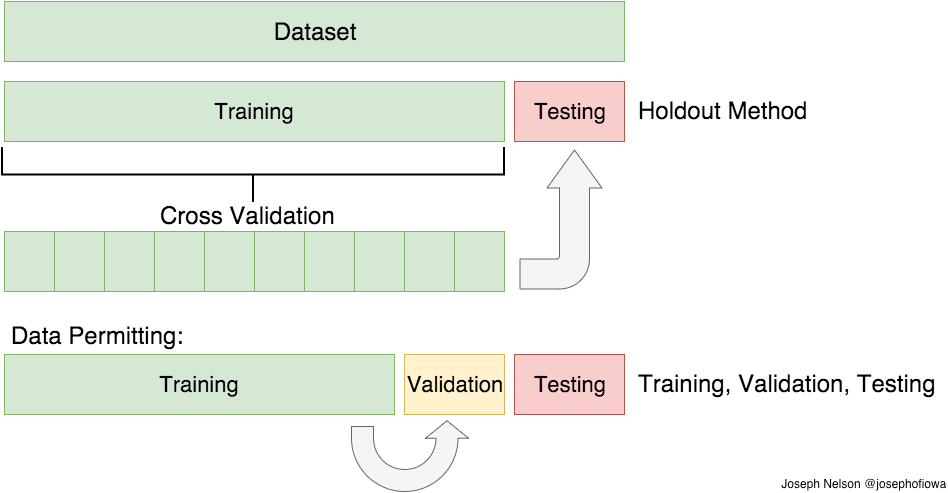

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into train and test.
X_train, X_test, y_train, y_test = train_test_split(dataset4.drop("Email_Status",axis=1),dataset4["Email_Status"],test_size = 0.2, random_state = 0)
print(f"There are {y_train.shape[0]} rows for training and {y_test.shape[0]} for testing")

There are 49805 rows for training and 12452 for testing


##### What data splitting ratio have you used and why? 

I have used 80:20 splitting ratio, Since I have considerable amount of data hence, 80:20 is a good choice. 80:20 splitting ratio which means 80% of the data is for training and 20% for testing.

80/20 is quite commonly occurring ratio, often referred to as the Pareto principle. It's usually a safe bet if we use that ratio.

### 9. Handling Imbalanced Dataset

In [ ]:
dataset4['Email_Status'].value_counts()

0    49909
1    10199
2     2149
Name: Email_Status, dtype: int64

##### Do you think the dataset is imbalanced? Explain Why.

Imbalance means that the number of data points available for different the classes is different: If there are two classes, then balanced data would mean 50% points for each of the class. For most machine learning techniques, little imbalance is not a problem. So, if there are 60% points for one class and 40% for the other class, it should not cause any significant performance degradation. Only when the class imbalance is high, e.g. 90% points for one class and 10% for the other, standard optimization criteria or performance measures may not be as effective and would need modification.

In our dataset, dependent column data ratio is 80:16:4. So, during model creating it's obvious that there will be bias and having a great chance of predicting the majority one so frequently. So the dataset should be balanced before it going for the model creation part.

In [ ]:
# Handaling imbalance dataset using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)


Class=0, n=39808 (33.333%)
Class=1, n=39808 (33.333%)
Class=2, n=39808 (33.333%)


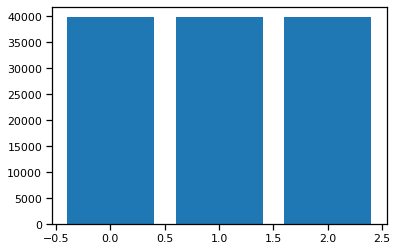

In [ ]:
#visualization of resampled data
from collections import Counter
counter = Counter(y_train)
for key,value in counter.items():
  per = value / len(y_train) * 100
  print('Class=%d, n=%d (%.3f%%)' % (key, value, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I have used SMOTE (Synthetic Minority Over-sampling technique) to balance the 80:16:4 data.

SMOTE technique generates synthetic data for the minority class. SMOTE (Synthetic Minority Oversampling Technique) works by ramdomly picking a point from a minority class and computing the k nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors. 

Since, SMOTE has the advantage of not creating duplicate data points. Hence, SMOTE is a superior oversampling option. for this reason, I have used SMOTE technique for balancing the dataset.

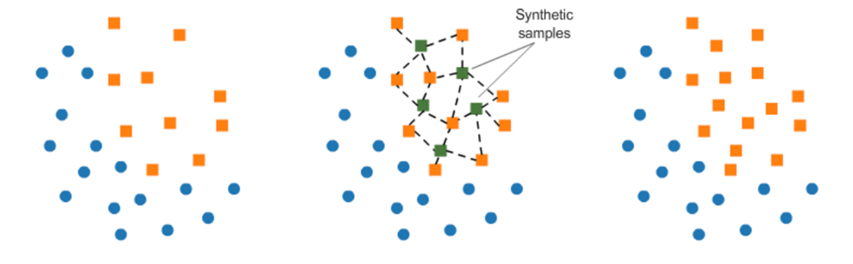

## **7. ML Model Implementation**

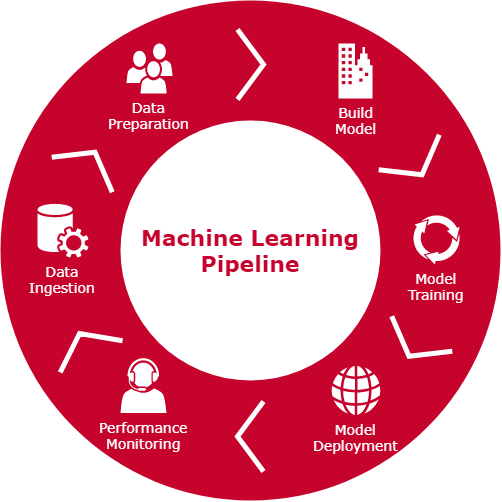

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, recall_score
from sklearn import metrics
from sklearn.metrics import roc_curve,roc_auc_score,precision_score, roc_auc_score
# from sklearn.metrics import roc_auc_ovr
# from sklearn.metrics import roc_auc_ovo
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from xgboost import XGBClassifier
from xgboost import XGBRFClassifier


### ML Model - 1 Logistic Regression

In [ ]:
# ML Model - 1 Implementation
lr = LogisticRegression(fit_intercept=True,
            class_weight='balanced',multi_class='multinomial')
# Fit the Algorithm
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', multi_class='multinomial')

In [ ]:
# Checking the coefficients
lr.coef_

array([[ 0.26303987, -0.02298383,  0.40487139,  0.01903091, -0.69611241,
         0.08856096,  0.01456615],
       [ 0.11646999,  0.01439145, -0.1923537 , -0.01807372,  0.38784794,
         0.09455285, -0.04701207],
       [-0.37950987,  0.00859238, -0.21251769, -0.00095719,  0.30826447,
        -0.18311381,  0.03244592]])

In [ ]:
# Checking the intercept value
lr.intercept_

array([ 0.33633621, -0.12091201, -0.2154242 ])

In [ ]:
# Predict on the model
# Get the predicted probabilities
train_probability_lr = lr.predict_proba(X_train)
test_probability_lr = lr.predict_proba(X_test)

In [ ]:
# Get the predicted classes
y_pred_train_lr = lr.predict(X_train)
y_pred_lr = lr.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

I used Logistic regression algorithm to create the model. 

**Logistic regression** is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

A logistic regression produces a logistic curve, which is limited to values between 0 and 1. 

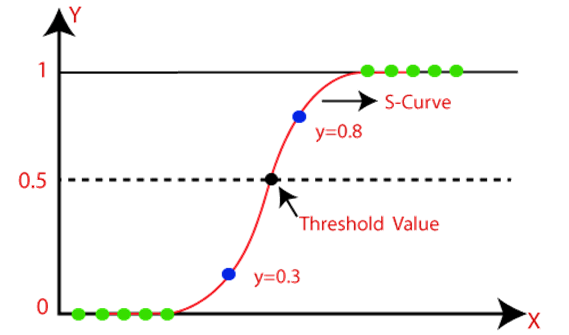

In [ ]:
#define a function which print the result of Evaluation metrics.
def print_metrics(actual_train,actual_test,predicted_train,predicted_test,test_probability):

  print('accuracy on train data is {}'.format(accuracy_score(actual_train,predicted_train)))
  print('accuracy on test data is {}'.format(accuracy_score(actual_test,predicted_test)))
  print('precision on test data is {}'.format(precision_score(actual_test,predicted_test,average='weighted')))
  print('recall on test data is {}'.format(recall_score(actual_test,predicted_test,average='weighted')))
  print('f1 Score on test data is {}'.format(f1_score(actual_test,predicted_test,average='weighted')))
  print('roc_auc_score on test data is {}'.format(roc_auc_score(actual_test, test_probability,multi_class='ovr',average='weighted')))

In [ ]:
print_metrics(y_train,y_test,y_pred_train_lr,y_pred_lr,test_probability_lr)

accuracy on train data is 0.502612540192926
accuracy on test data is 0.6039190491487312
precision on test data is 0.777698299335829
recall on test data is 0.6039190491487312
f1 Score on test data is 0.669951401228324
roc_auc_score on test data is 0.7260807115137446


In [ ]:
# Visualizing evaluation Metric Score chart that is confusion matrix for both training and testing data

def confusion_metrics(actual_train,actual_test,predicted_train,predicted_test):
  labels = ['Ignored', 'Opened', 'Acknowledged']
  cm1 = confusion_matrix(actual_train, predicted_train)
  ax1= plt.subplot()
  sns.heatmap(cm1, annot=True, ax = ax1) #annot=True to annotate cells
  ax1.set_xlabel('Predicted labels')
  ax1.set_ylabel('True labels')
  ax1.set_title('Confusion Matrix for training data')
  ax1.xaxis.set_ticklabels(labels)
  ax1.yaxis.set_ticklabels(labels)
  plt.show()
  print(" ")

  cm2 = confusion_matrix(actual_test, predicted_test)
  ax2= plt.subplot()
  sns.heatmap(cm2, annot=True, ax = ax2) 
  # labels, title and ticks
  ax2.set_xlabel('Predicted labels')
  ax2.set_ylabel('True labels')
  ax2.set_title('Confusion Matrix for testing data')
  ax2.xaxis.set_ticklabels(labels)
  ax2.yaxis.set_ticklabels(labels)
  plt.show()

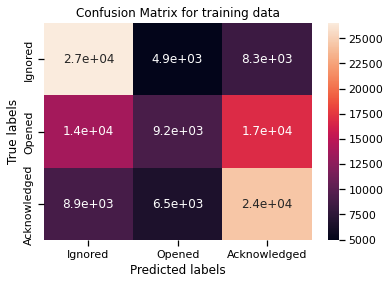

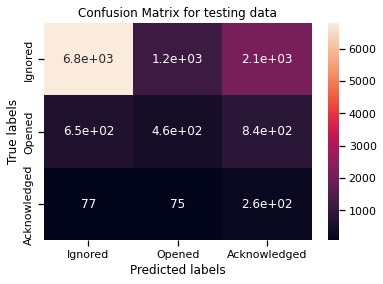

In [ ]:
confusion_metrics(y_train,y_test,y_pred_train_lr,y_pred_lr)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques.
model = LogisticRegression(fit_intercept=True, max_iter=10000,
            class_weight='balanced',multi_class='multinomial')
solvers = ['lbfgs']
penalty = ['l2']
c_values = [1000,100, 10, 1.0, 0.1, 0.01,0.001]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

# Fit the Algorithm
grid_result=grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.000000 using {'C': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
# Predict on the model
# Get the predicted probabilities
train_probability_lrh = grid_result.predict_proba(X_train)
test_probability_lrh = grid_result.predict_proba(X_test)

In [ ]:
# Predict on the model
# Get the predicted classes
y_pred_train_lrh = grid_result.predict(X_train)
y_pred_lrh = grid_result.predict(X_test)

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
print_metrics(y_train,y_test,y_pred_train_lrh,y_pred_lrh,test_probability_lrh)

accuracy on train data is 0.5026209137191854
accuracy on test data is 0.6039993575329264
precision on test data is 0.7777094815280307
recall on test data is 0.6039993575329264
f1 Score on test data is 0.6700092191500202
roc_auc_score on test data is 0.7260822387895463


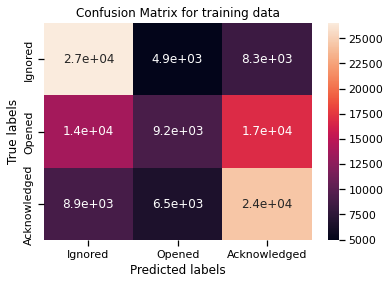

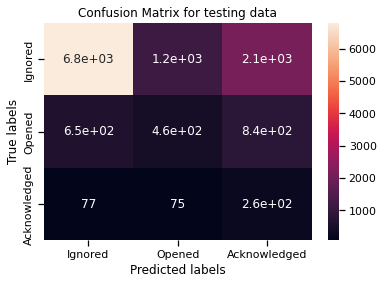

In [ ]:
# Visualizing evaluation Metric Score chart that is confusion matrix for both training and testing data
confusion_metrics(y_train,y_test,y_pred_train_lrh,y_pred_lrh)

There is no such improvement in the result while using Cross- Validation & Hyperparameter Tuning because our dataset is large enough to give accurate result using Hold-Out Method.


### ML Model - 2 Random Forest Classifier

In [ ]:
# ML Model - 2 Implementation
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Fit the Algorithm
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
# Predict on the model
# Making predictions on train and test data
y_pred_train_rf = rf_model.predict(X_train)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Predict on the model
# Get the predicted probabilities
train_probability_rf = rf_model.predict_proba(X_train)
test_probability_rf = rf_model.predict_proba(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

I used Random Forest Classifier to create the model.

**Random Forest Classifier** is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset. The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.

The below diagram explains the working of the Random Forest algorithm:

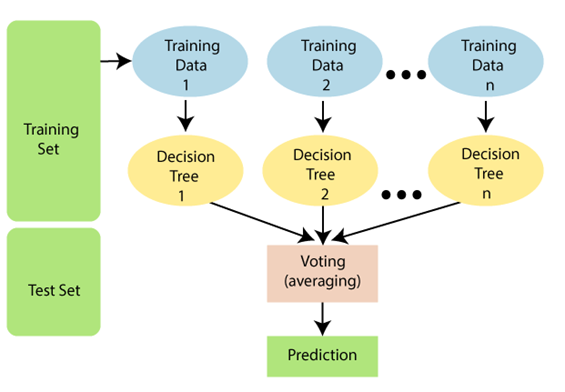

whereas **Decision Tree Classifier** is a tree-structured classifier in which there are two nodes, called as Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, on the other hand Leaf nodes are the output of those decisions and do not contain any further branches.




In [ ]:
print_metrics(y_train,y_test,y_pred_train_rf,y_pred_rf,test_probability_rf)

accuracy on train data is 0.9986016211146839
accuracy on test data is 0.7604400899453903
precision on test data is 0.7542166835406728
recall on test data is 0.7604400899453903
f1 Score on test data is 0.7571096119098425
roc_auc_score on test data is 0.7440812591702299


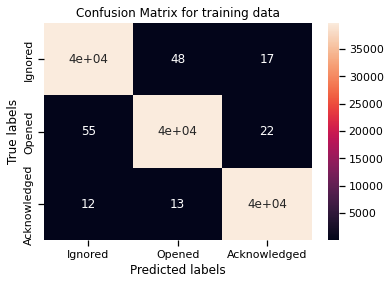

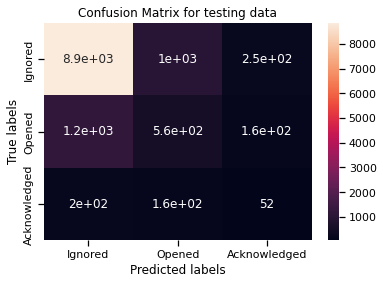

In [ ]:
# Visualizing evaluation Metric Score chart that is confusion matrix for both training and testing data
confusion_metrics(y_train,y_test,y_pred_train_rf,y_pred_rf)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='f1')


# Fit the Algorithm
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   4.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   3.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   4.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   6.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   4.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   4.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   5.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   5.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   4.4s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='f1', verbose=2)

In [ ]:
#best parameter
print("Best: %f using %s" % (rf_grid.best_score_, rf_grid.best_params_))

Best: nan using {'max_depth': 4, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 50}


In [ ]:
# Predict on the model
# Making predictions on train and test data
y_pred_train_rfh = rf_grid.predict(X_train)
y_pred_rfh = rf_grid.predict(X_test)

In [ ]:
# Predict on the model
# Get the predicted probabilities
train_probability_rfh = rf_grid.predict_proba(X_train)
test_probability_rfh = rf_grid.predict_proba(X_test)

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
print_metrics(y_train,y_test,y_pred_train_rfh,y_pred_rfh,test_probability_rfh)

accuracy on train data is 0.5442457127545552
accuracy on test data is 0.658287825248956
precision on test data is 0.7845367114226569
recall on test data is 0.658287825248956
f1 Score on test data is 0.7066549275366657
roc_auc_score on test data is 0.7691006861184877


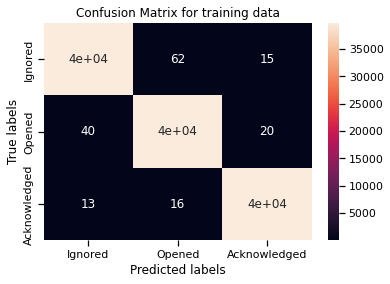

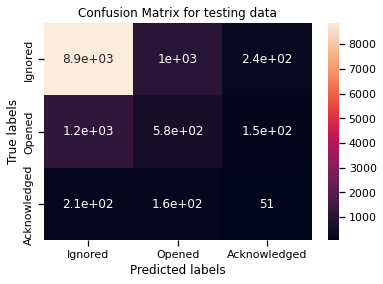

In [ ]:
# Visualizing evaluation Metric Score chart that is confusion matrix for both training and testing data
confusion_metrics(y_train,y_test,y_pred_train_rf,y_pred_rf)

There is no such improvement in the result while using Cross- Validation & Hyperparameter Tuning because our dataset is large enough to give accurate result using Hold-Out Method.

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

I have used these metrices for evaluation of the model and their impact on business are as follows:

**Accuracy:** This metric indicates the percentage of correctly classified instances out of the total number of instances. In a business setting, this would indicate the overall effectiveness of the model in making correct predictions. A high accuracy score would have a positive impact on the business, as it would indicate a high level of confidence in the model's predictions.

**Precision:** This metric indicates the proportion of true positive predictions out of all positive predictions made by the model. In a business setting, this would indicate the level of confidence in the model's ability to identify positive instances correctly. A high precision score would have a positive impact on the business, as it would indicate that the model is not making false positive predictions.

**Recall:** This metric indicates the proportion of true positive predictions out of all actual positive instances. In a business setting, this would indicate the model's ability to identify all positive instances. A high recall score would have a positive impact on the business, as it would indicate that the model is not missing any positive instances.

**F1 Score:** This metric is a combination of precision and recall and is used to balance the trade-off between the two. In a business setting, this would indicate the overall effectiveness of the model in making correct predictions while also avoiding false positives and false negatives. A high F1 score would have a positive impact on the business, as it would indicate that the model is making accurate predictions while also being able to identify all positive instances.

**ROC AUC:** This metric indicates the ability of the model to distinguish between positive and negative instances. In a business setting, this would indicate the model's ability to correctly classify instances as positive or negative. A high ROC AUC score would have a positive impact on the business, as it would indicate that the model is able to correctly classify instances.

In summary, the Random Forest Classifier can be considered as an efficient model for the business, especially when it achieves high scores in all of these evaluation metrics, which would indicate that it can accurately predict outcomes, identify all positive instances, and correctly classify instances as positive or negative.

### ML Model - 3 XgBoost Classifier

In [ ]:
# Create an instance of the RandomForestClassifier
xg_model = XGBClassifier()

# Fit the Algorithm
xg_models=xg_model.fit(X_train,y_train)

In [ ]:
# Predict on the model
# Making predictions on train and test data

y_pred_train_xg = xg_models.predict(X_train)
y_pred_xg = xg_models.predict(X_test)

In [ ]:
# Predict on the model
# Get the predicted probabilities
train_probability_xg = xg_models.predict_proba(X_train)
test_probability_xg = xg_models.predict_proba(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

XGBoost stands for “Extreme Gradient Boosting”. XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements Machine Learning algorithms under the Gradient Boosting framework. It provides a parallel tree boosting to solve many data science problems in a fast and accurate way. 

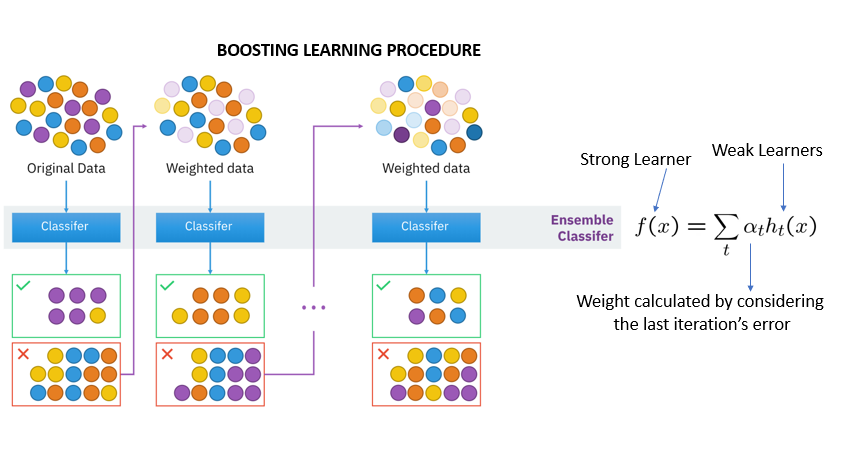

In [ ]:
print_metrics(y_train,y_test,y_pred_train_xg,y_pred_xg,test_probability_xg)

accuracy on train data is 0.8034314710610932
accuracy on test data is 0.8035656922582718
precision on test data is 0.7698230161040763
recall on test data is 0.8035656922582718
f1 Score on test data is 0.7814596202072881
roc_auc_score on test data is 0.7849869339443809


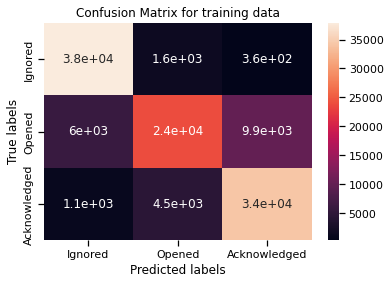

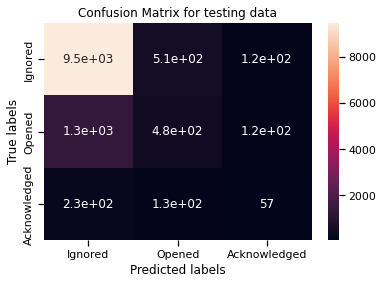

In [ ]:
# Visualizing evaluation Metric Score chart that is confusion matrix for both training and testing data
confusion_metrics(y_train,y_test,y_pred_train_xg,y_pred_xg)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques 
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the XGBClassifier
xg_model = XGBClassifier()

# Fit the Algorithm
# Grid search
xg_grid = GridSearchCV(estimator=xg_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

xg_grid1=xg_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[09:30:48] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   9.2s
[09:30:57] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=  21.5s
[09:31:18] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=  16.1s
[09:31:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=  15.0s
[09:31:49] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_lea

In [ ]:
#best parameter
print("Best: %f using %s" % (xg_grid.best_score_, xg_grid.best_params_))

Best: nan using {'max_depth': 4, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 50}


In [ ]:
# Predict on the model
# Making predictions on train and test data

y_pred_train_xgh = xg_grid1.predict(X_train)
y_pred_xgh = xg_grid1.predict(X_test)

In [ ]:
# Predict on the model
# Get the predicted probabilities
train_probability_xgh = xg_grid1.predict_proba(X_train)
test_probability_xgh = xg_grid1.predict_proba(X_test)

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
print_metrics(y_train,y_test,y_pred_train_xgh,y_pred_xgh,test_probability_xgh)

accuracy on train data is 0.6814626875669882
accuracy on test data is 0.7508833922261484
precision on test data is 0.780917723464268
recall on test data is 0.7508833922261484
f1 Score on test data is 0.7637850696465649
roc_auc_score on test data is 0.7868418571013924


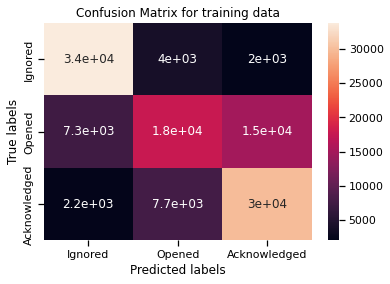

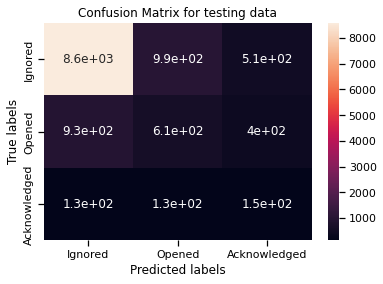

In [ ]:
# Visualizing evaluation Metric Score chart that is confusion matrix for both training and testing data
confusion_metrics(y_train,y_test,y_pred_train_xgh,y_pred_xgh)

There is no such improvement in the result while using Cross- Validation & Hyperparameter Tuning because our dataset is large enough to give accurate result using Hold-Out Method.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

When evaluating the effectiveness of an email campaign in a classification model, the following evaluation metrics would be considered for a positive business impact:

* **Precision**: This metric indicates the proportion of true positive predictions (emails that were opened and resulted in a desired action) out of all positive predictions made by the model. In a business setting, this would indicate the level of confidence in the model's ability to identify individuals who are likely to engage with the campaign. A high precision score would have a positive impact on the business, as it would indicate that the model is not making false positive predictions and is effectively identifying individuals who are likely to engage with the campaign.

* **Recall**: This metric indicates the proportion of true positive predictions (emails that were opened and resulted in a desired action) out of all actual positive instances (emails that were opened and resulted in a desired action). In a business setting, this would indicate the model's ability to identify all individuals who engaged with the campaign. A high recall score would have a positive impact on the business, as it would indicate that the model is not missing any individuals who engaged with the campaign.

* **F1 Score**: This metric is a combination of precision and recall and is used to balance the trade-off between the two. In a business setting, this would indicate the overall effectiveness of the model in identifying individuals who are likely to engage with the campaign while also avoiding false positives and false negatives. A high F1 score would have a positive impact on the business, as it would indicate that the model is effectively identifying individuals who are likely to engage with the campaign while also being able to identify all individuals who engaged with the campaign.

* **ROC AUC**: This metric indicates the ability of the model to distinguish between positive and negative instances. In a business setting, this would indicate the model's ability to correctly classify instances as positive (engaged with the campaign) or negative (did not engage with the campaign). A high ROC AUC score would have a positive impact on the business, as it would indicate that the model is able to correctly classify individuals as likely to engage with the campaign or not.

The evaluation metrics that would be considered for a positive business impact of an email campaign effectiveness in a classification model are **precision, recall** which combine to provide F1 score. These metrics would indicate the model's ability to identify individuals who are likely to engage with the campaign while also being able to identify all individuals who engaged with the campaign, and correctly classify instances as positive or negative.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

####Evaluation metrics for all classifiers

In [ ]:
#all classifiers
Model = ["Logistic Regression","Random Forest","Xgboost"]

In [ ]:
#creating dataframe for all classifiers using dictionary
pd.DataFrame({"Model":Model,
'Train Accuracy':[0.502621,0.544245,0.681462],
'Test Accuracy':[0.603999,0.658287,0.750883],
'Precision':[0.777709,0.784536,0.780917],
'Recall':[0.603999,0.658287,0.750883],
'F1 Score':[0.670009,0.706654,0.763785],
'roc_auc_score':[0.726082,0.769101,0.786841]})

Model  Train Accuracy  Test Accuracy  Precision    Recall  \
0  Logistic Regression        0.502621       0.603999   0.777709  0.603999   
1        Random Forest        0.544245       0.658287   0.784536  0.658287   
2              Xgboost        0.681462       0.750883   0.780917  0.750883   

   F1 Score  roc_auc_score  
0  0.670009       0.726082  
1  0.706654       0.769101  
2  0.763785       0.786841

We can see from above table that 

1) Xgboost have highest Training and Testing Accuracy.

2) Xgboost also have best Recall score, F1 Score and Roc_auc_Score.

Hence we can say that Xgboost is the best Model. Thus, I have choosen XGBoost model which is hyperparameter optimized.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

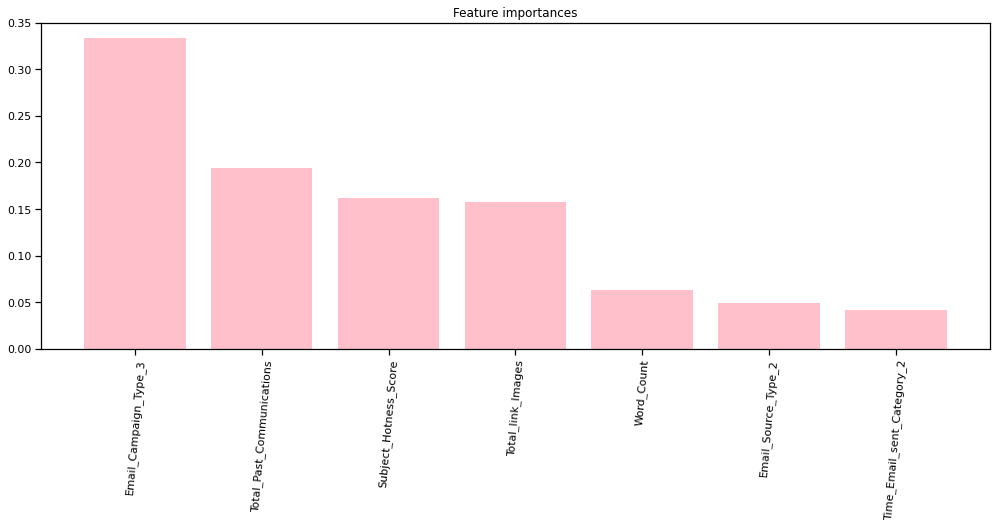

In [ ]:
#Feature Importance
feature_importances_xg = pd.DataFrame(xg_models.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance_xg']).sort_values('importance_xg',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_xg.index, feature_importances_xg['importance_xg'],
        color="pink",  align="center")
plt.xticks(feature_importances_xg.index, rotation = 85)

plt.show()

---
# **Conclusion**

---

* ### As we observed that Email_Campaign_Type_3 was the most important feature. If your Email_Campaign_Type was 1, there is a 90% likelihood of your Email to be read/acknowledged.


* ### It was observed that both Time_Email_Sent and Customer_Location was insignificant in determining the Email status. The ratio of the Email Status was the same irrespective of the demographic location or the time frame the emails were sent on. 

  ### Emails sent in category 2 during the middle of the day will undoubtedly receive more reading and acknowledgment than those sent in categories 1 and 2 during the day.

* ### As the word_count increases beyond the 600 mark we see that there is a high possibility of that email being ignored. The ideal mark is 400-600. No one is interested in reading long emails! 

* ### Emails that were ignored contained more pictures.

* ### With the exception of Word Count, practically all continuous variables had outliers. After analysis, it was discovered that outliers account for more than 5% of the minority data and will affect the results in either direction, therefore it was preferable to leave them in.

* ### Although SMOTE appears to have performed much better, information loss is possible. 

* ### Based on the metrics, XGBoost Classifier worked the best, giving a test score of 76% for F1 score and 78% for roc-auc score respectively.

----



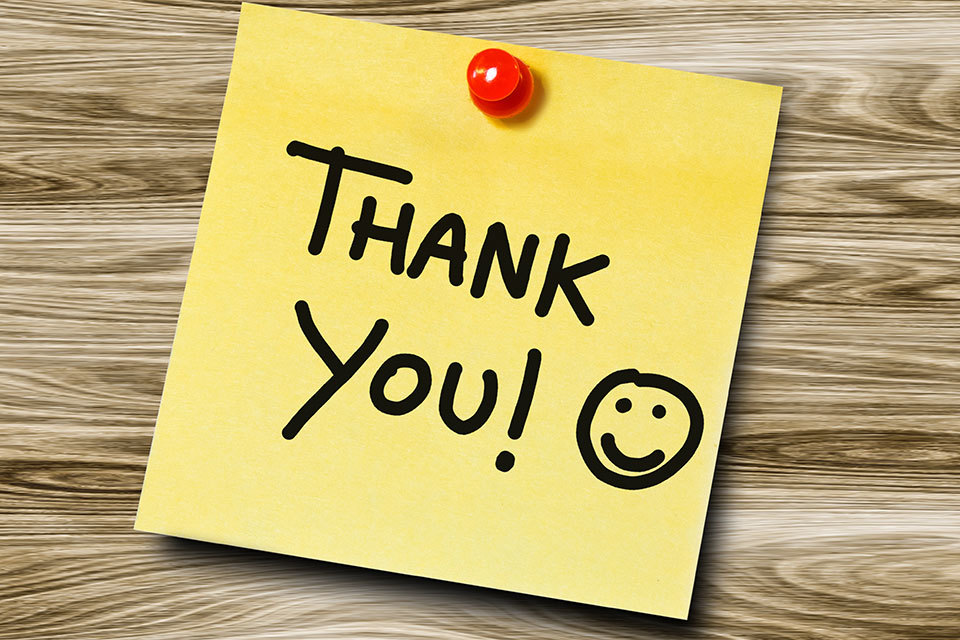